## Summary

The task is to predict customer churn for a telecom company by analyzing their usage patterns and service interactions. The goal is to build a machine learning model that identifies key factors contributing to customer churn and provides actionable insights to reduce future churn rates.

**Objectives:**
* **Understand the customer usage patterns:** Analyze the dataset to discover how customers engage with various services (e.g., calls, internet usage, recharges).
* **Identify churners:** Define churn based on customer inactivity (e.g., no calls or internet usage in the last month).
* **Feature Engineering:** Create relevant features that highlight customer behavior, such as monthly usage, recharge amounts, and service engagement.
* **Model Training and Prediction:** Train machine learning models to predict churn, evaluate their performance, and select the most effective model.
* **Feature Importance:** Identify the most important features contributing to churn using methods like logistic regression or decision trees.
* **Provide Recommendations:** Based on the analysis, offer strategies that can help reduce customer churn and retain high-value customers.

**Expected Outcomes:**
* A machine learning model capable of predicting customer churn with good accuracy.
* Insights into the key factors driving customer churn.
* Visualizations and tables that highlight the most significant features.
* Strategic recommendations for the business to minimize churn and retain customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import os

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

##### Importing the data set

In [3]:
telecom_data=pd.read_csv("telecom_churn_data.csv")

In [4]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
telecom_data.shape

(99999, 226)

###### Reading the data dictionary

In [6]:
col=list(telecom_data.columns)
col

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [7]:
telecom_data_dictionary=pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [8]:
telecom_data_dictionary

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


#### Data Preparation

##### Filtering  High Value customers since the objective is to predict churn only for the high value customers

##### High Value Customers are defined customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

##### Data Cleaning

#### $ Checking for the duplicated date

In [9]:
duplicated=telecom_data[telecom_data.duplicated()]
duplicated

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


##### There are no duplicated values

##### Checking for data variance in each column and droppin the columns that doesn't have any variance

In [10]:
telecom_data.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [11]:
col_to_drop=[col for col in telecom_data.columns if telecom_data[col].nunique()==1]
col_to_drop

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [12]:
telecom_data.shape

(99999, 226)

In [13]:
telecom_data.drop(col_to_drop,axis=1,inplace=True)
telecom_data.shape

(99999, 210)

##### Checking for the data types of the columns

In [14]:
telecom_data.dtypes

mobile_number                 int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2t_mou_9            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            

##### Observation:We can see the date_* column has data type object. We shall convert this to datetime format

In [15]:
date_col= telecom_data.select_dtypes(include=['object']).columns
date_col

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [16]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.

In [17]:
for i in date_col:
    telecom_data[i] = pd.to_datetime(telecom_data[i])
telecom_data.filter(like='date').dtypes

date_of_last_rech_6         datetime64[ns]
date_of_last_rech_7         datetime64[ns]
date_of_last_rech_8         datetime64[ns]
date_of_last_rech_9         datetime64[ns]
date_of_last_rech_data_6    datetime64[ns]
date_of_last_rech_data_7    datetime64[ns]
date_of_last_rech_data_8    datetime64[ns]
date_of_last_rech_data_9    datetime64[ns]
dtype: object

##### Handling missing values

In [18]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

max_rech_data_6             74.846748
fb_user_6                   74.846748
count_rech_3g_6             74.846748
count_rech_2g_6             74.846748
night_pck_user_6            74.846748
arpu_3g_6                   74.846748
total_rech_data_6           74.846748
av_rech_amt_data_6          74.846748
arpu_2g_6                   74.846748
date_of_last_rech_data_6    74.846748
arpu_3g_7                   74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
count_rech_2g_7             74.428744
count_rech_3g_9             74.077741
date_of_last_rech_data_9    74.077741
count_rech_2g_9             74.077741
fb_user_9                   74.077741
total_rech_data_9           74.077741
max_rech_data_9             74.077741
night_pck_us

###### Handling missing values related to recharge columns

In [19]:
telecom_data[['date_of_last_rech_data_6','av_rech_amt_data_6','total_rech_data_6']].head(10)

,date_of_last_rech_data_6,av_rech_amt_data_6,total_rech_data_6
0,2014-06-21,252.0,1.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,56.0,1.0
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,NaT,NaN,NaN
9,NaT,NaN,NaN


##### Observation: From the above , we can understand that date_of_last_rech_data_6 indicating the date of last recharge is null then 
##### columns 'av_rech_amt_data_6' and 'total_rech_data_6' having null values indicate a meaningful missing. So we can replace those null values with zer0

In [20]:
result = telecom_data[(telecom_data['date_of_last_rech_data_6'].isnull()) & (telecom_data['av_rech_amt_data_6'].notna() | telecom_data['total_rech_data_6'].notna()| telecom_data['max_rech_data_6'].notna())]
result

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


##### This proves that if date_of_last_rech_data_* is null then  av_rech_amt_data_* , total_rech_data_* ,max_rech_data_6 are null. 

In [21]:
result = telecom_data[(telecom_data['av_rech_amt_data_6'].isnull() & telecom_data['total_rech_data_6'].notna())]
result

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


In [22]:
result = telecom_data[(telecom_data['max_rech_data_6'].isnull() & telecom_data['total_rech_data_6'].notna())]
result

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


In [23]:
result = telecom_data[(telecom_data['av_rech_amt_data_6'].isnull() & telecom_data['total_rech_data_6'].notna())]
result

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


##### This proves that if av_rech_amt_data_* is null then both total_rech_data_*  and max_rech_data_* are also null and vice versa. And if max_rech_data_* is null then both av_rech_amt_data_*  and total_rech_data_* are null and vice versa. So now we can impute those columns of all months(6,7,8,9) with zero in recharge columns

In [24]:
recharge_col=['av_rech_amt_data_6','total_rech_data_6','max_rech_data_6','av_rech_amt_data_7','total_rech_data_7','max_rech_data_7','av_rech_amt_data_8','total_rech_data_8','max_rech_data_8','av_rech_amt_data_9','total_rech_data_9','max_rech_data_9']
recharge_col

['av_rech_amt_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'av_rech_amt_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_9',
 'total_rech_data_9',
 'max_rech_data_9']

In [25]:
telecom_data[recharge_col].isnull().mean()*100

av_rech_amt_data_6    74.846748
total_rech_data_6     74.846748
max_rech_data_6       74.846748
av_rech_amt_data_7    74.428744
total_rech_data_7     74.428744
max_rech_data_7       74.428744
av_rech_amt_data_8    73.660737
total_rech_data_8     73.660737
max_rech_data_8       73.660737
av_rech_amt_data_9    74.077741
total_rech_data_9     74.077741
max_rech_data_9       74.077741
dtype: float64

In [26]:
telecom_data[recharge_col]=telecom_data[recharge_col].apply(lambda x:x.fillna(0))

In [27]:
telecom_data[recharge_col].isnull().mean()*100

av_rech_amt_data_6    0.0
total_rech_data_6     0.0
max_rech_data_6       0.0
av_rech_amt_data_7    0.0
total_rech_data_7     0.0
max_rech_data_7       0.0
av_rech_amt_data_8    0.0
total_rech_data_8     0.0
max_rech_data_8       0.0
av_rech_amt_data_9    0.0
total_rech_data_9     0.0
max_rech_data_9       0.0
dtype: float64

##### Handling the count_rech_* columns

In [28]:
telecom_data[['count_rech_3g_6','count_rech_2g_6','total_rech_data_6']].head(100)

,count_rech_3g_6,count_rech_2g_6,total_rech_data_6
0,1.0,0.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,0.0,1.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


##### From the above result we can clearly see (total_rech_data_*)=(count_rech_3g_*)+(count_rech_2g_6). This leads to multicollinearity. So we can drop the count_rech* columms

In [29]:
telecom_data.shape

(99999, 210)

In [30]:
telecom_data.drop(['count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9'],axis=1,inplace=True)

In [31]:
telecom_data.shape

(99999, 202)

In [32]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

fb_user_6                   74.846748
arpu_3g_6                   74.846748
date_of_last_rech_data_6    74.846748
night_pck_user_6            74.846748
arpu_2g_6                   74.846748
arpu_2g_7                   74.428744
night_pck_user_7            74.428744
date_of_last_rech_data_7    74.428744
fb_user_7                   74.428744
arpu_3g_7                   74.428744
fb_user_9                   74.077741
arpu_3g_9                   74.077741
arpu_2g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_user_9            74.077741
night_pck_user_8            73.660737
fb_user_8                   73.660737
date_of_last_rech_data_8    73.660737
arpu_2g_8                   73.660737
arpu_3g_8                   73.660737
std_ic_t2m_mou_9             7.745077
spl_ic_mou_9                 7.745077
std_og_t2t_mou_9             7.745077
isd_og_mou_9                 7.745077
std_og_t2m_mou_9             7.745077
spl_og_mou_9                 7.745077
loc_og_mou_9

In [33]:
telecom_data['fb_user_6'].value_counts(normalize=True)*100

fb_user_6
1.0    91.440385
0.0     8.559615
Name: proportion, dtype: float64

In [34]:
telecom_data['fb_user_7'].value_counts(normalize=True)*100

fb_user_7
1.0    90.876383
0.0     9.123617
Name: proportion, dtype: float64

In [35]:
telecom_data['fb_user_8'].value_counts(normalize=True)*100

fb_user_8
1.0    89.080831
0.0    10.919169
Name: proportion, dtype: float64

In [36]:
telecom_data['fb_user_9'].value_counts(normalize=True)*100

fb_user_9
1.0    86.096752
0.0    13.903248
Name: proportion, dtype: float64

In [37]:
telecom_data['night_pck_user_6'].value_counts(normalize=True)*100

night_pck_user_6
0.0    97.491353
1.0     2.508647
Name: proportion, dtype: float64

In [38]:
telecom_data['night_pck_user_7'].value_counts(normalize=True)*100

night_pck_user_7
0.0    97.696609
1.0     2.303391
Name: proportion, dtype: float64

In [39]:
telecom_data['night_pck_user_8'].value_counts(normalize=True)*100

night_pck_user_8
0.0    97.915638
1.0     2.084362
Name: proportion, dtype: float64

In [40]:
telecom_data['night_pck_user_9'].value_counts(normalize=True)*100

night_pck_user_9
0.0    98.402901
1.0     1.597099
Name: proportion, dtype: float64

##### A rule of thumb where if one category constitutes less than 5% or 1% of the total instances, we can drop these columns since those columns are highly biased

In [41]:
col_drop=['fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']
col_drop

['fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9']

In [42]:
telecom_data.shape

(99999, 202)

In [43]:
telecom_data.drop(col_drop,axis=1,inplace=True)

In [44]:
telecom_data.shape

(99999, 194)

In [45]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

date_of_last_rech_data_6    74.846748
arpu_2g_6                   74.846748
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_2g_7                   74.428744
date_of_last_rech_data_7    74.428744
arpu_3g_9                   74.077741
arpu_2g_9                   74.077741
date_of_last_rech_data_9    74.077741
date_of_last_rech_data_8    73.660737
arpu_3g_8                   73.660737
arpu_2g_8                   73.660737
loc_og_t2f_mou_9             7.745077
isd_og_mou_9                 7.745077
std_ic_t2t_mou_9             7.745077
loc_og_t2c_mou_9             7.745077
spl_ic_mou_9                 7.745077
loc_ic_t2t_mou_9             7.745077
ic_others_9                  7.745077
std_ic_mou_9                 7.745077
loc_og_mou_9                 7.745077
std_og_mou_9                 7.745077
spl_og_mou_9                 7.745077
std_og_t2t_mou_9             7.745077
std_ic_t2m_mou_9             7.745077
std_og_t2f_mou_9             7.745077
std_og_t2m_m

In [46]:
date_col

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

##### We can drop the date* columns as those columns have no more significance

In [47]:
telecom_data.shape

(99999, 194)

In [48]:
telecom_data.drop(date_col,axis=1,inplace=True)

In [49]:
telecom_data.shape

(99999, 186)

In [50]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

arpu_3g_6             74.846748
arpu_2g_6             74.846748
arpu_3g_7             74.428744
arpu_2g_7             74.428744
arpu_2g_9             74.077741
arpu_3g_9             74.077741
arpu_3g_8             73.660737
arpu_2g_8             73.660737
std_og_t2f_mou_9       7.745077
std_ic_mou_9           7.745077
std_ic_t2f_mou_9       7.745077
loc_og_mou_9           7.745077
std_og_t2t_mou_9       7.745077
std_ic_t2m_mou_9       7.745077
std_og_t2m_mou_9       7.745077
std_ic_t2t_mou_9       7.745077
loc_og_t2c_mou_9       7.745077
loc_ic_mou_9           7.745077
std_og_mou_9           7.745077
isd_og_mou_9           7.745077
loc_og_t2m_mou_9       7.745077
loc_ic_t2f_mou_9       7.745077
spl_og_mou_9           7.745077
loc_ic_t2m_mou_9       7.745077
og_others_9            7.745077
loc_og_t2f_mou_9       7.745077
loc_ic_t2t_mou_9       7.745077
roam_og_mou_9          7.745077
isd_ic_mou_9           7.745077
offnet_mou_9           7.745077
ic_others_9            7.745077
loc_og_t

##### Checking on arpu(Average Revenue Per User). Looks like this term have some correlation with av_rech_amt_data_6 and total_rech_amt_*(total recharge amount).Let's chedck the correlation

In [51]:
telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6','total_rech_amt_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6,total_rech_amt_6
0,212.17,212.17,252.0,362
1,NaN,NaN,0.0,74
2,NaN,NaN,0.0,168
3,NaN,NaN,0.0,230
4,0.00,0.00,56.0,196
5,NaN,NaN,0.0,120
6,NaN,NaN,0.0,499
7,NaN,NaN,0.0,1580
8,NaN,NaN,0.0,437
9,NaN,NaN,0.0,220


In [52]:
def create_heat_map(corr_matrix, title):
    # Plot the heatmap
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
    
    # Display the heatmap
    plt.title(title)
    plt.show()

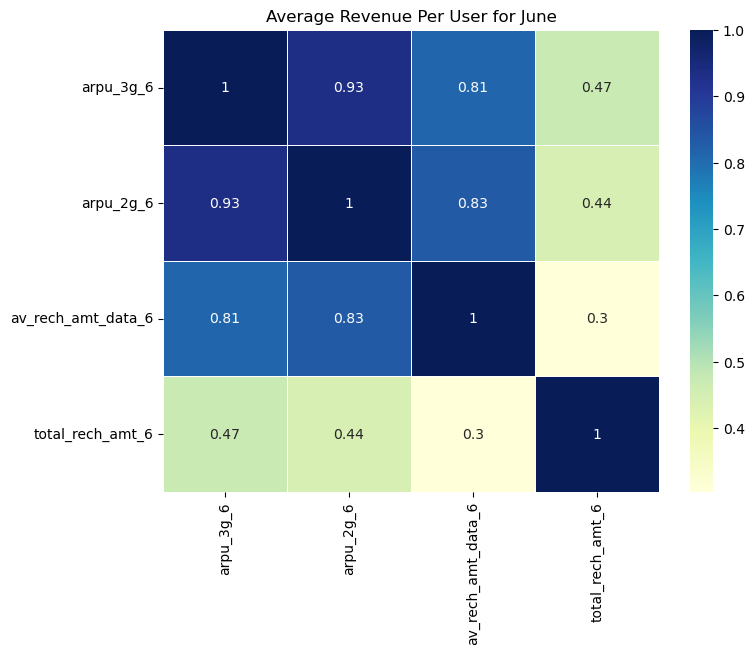

In [53]:
create_heat_map(telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6','total_rech_amt_6']].corr(), 'Average Revenue Per User for June')

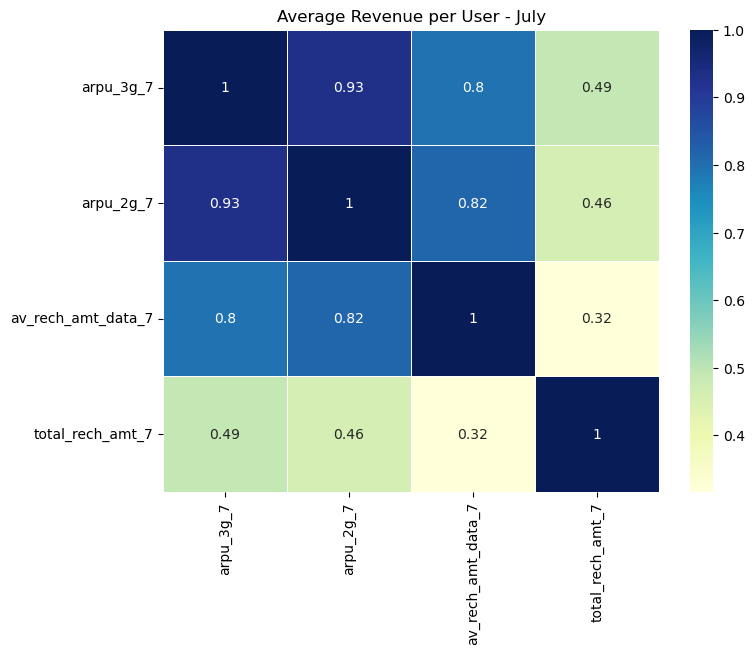

In [54]:
create_heat_map(telecom_data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7','total_rech_amt_7']].corr(), 'Average Revenue per User - July')

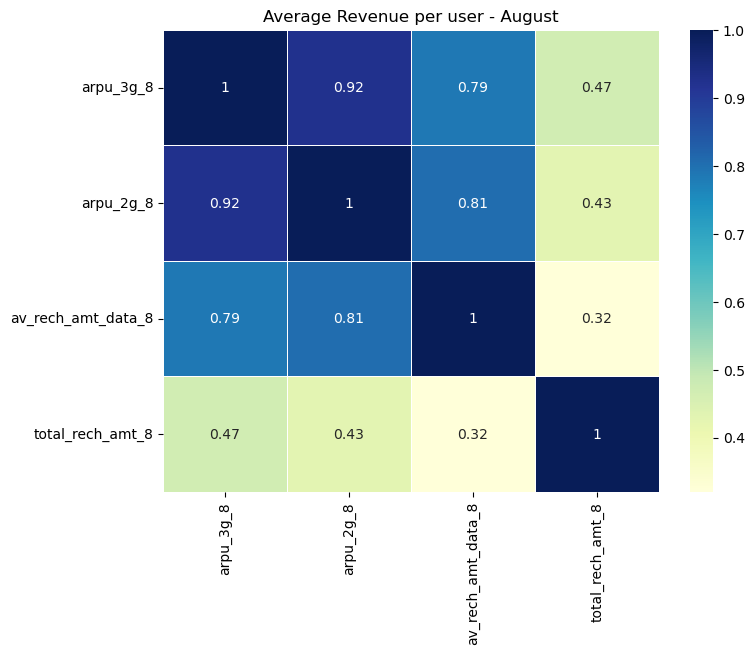

In [55]:
create_heat_map(telecom_data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8','total_rech_amt_8']].corr(),'Average Revenue per user - August')

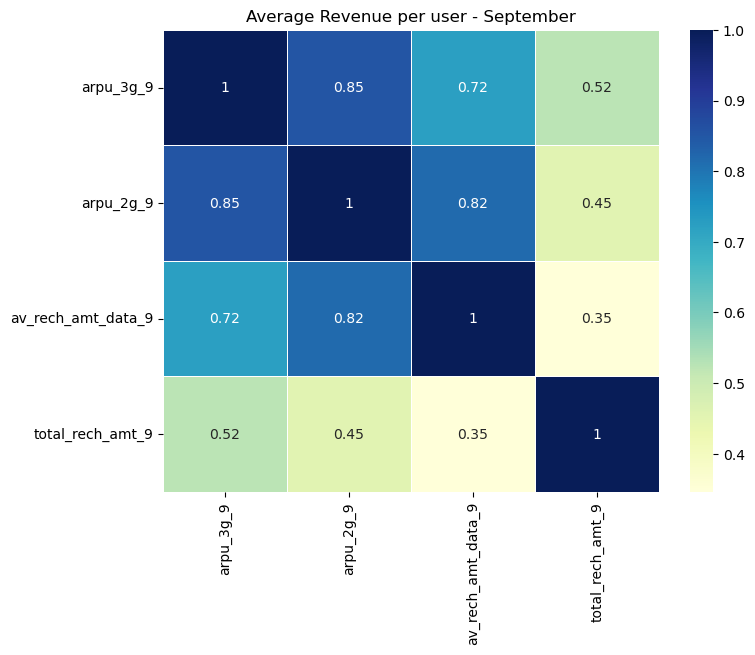

In [56]:
create_heat_map(telecom_data[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9','total_rech_amt_9']].corr(), 'Average Revenue per user - September')

##### Observations: From the above results we can see arpu_3g_* and arpu_2g_* are highly correlated with av_rech_amt_data_*. So we can drop those columns

In [57]:
col_drop=['arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9']
col_drop

['arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9']

In [58]:
telecom_data.shape

(99999, 186)

In [59]:
telecom_data.drop(col_drop,axis=1,inplace=True)

In [60]:
telecom_data.shape

(99999, 178)

In [61]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

std_og_t2t_mou_9      7.745077
roam_ic_mou_9         7.745077
loc_ic_mou_9          7.745077
loc_og_t2c_mou_9      7.745077
std_og_t2m_mou_9      7.745077
loc_og_t2f_mou_9      7.745077
std_og_t2f_mou_9      7.745077
std_og_mou_9          7.745077
loc_og_t2m_mou_9      7.745077
std_ic_t2f_mou_9      7.745077
spl_ic_mou_9          7.745077
loc_og_t2t_mou_9      7.745077
isd_og_mou_9          7.745077
std_ic_mou_9          7.745077
spl_og_mou_9          7.745077
og_others_9           7.745077
roam_og_mou_9         7.745077
std_ic_t2m_mou_9      7.745077
isd_ic_mou_9          7.745077
ic_others_9           7.745077
loc_ic_t2f_mou_9      7.745077
loc_ic_t2m_mou_9      7.745077
onnet_mou_9           7.745077
std_ic_t2t_mou_9      7.745077
loc_og_mou_9          7.745077
loc_ic_t2t_mou_9      7.745077
offnet_mou_9          7.745077
isd_og_mou_8          5.378054
std_ic_t2f_mou_8      5.378054
og_others_8           5.378054
std_og_mou_8          5.378054
spl_og_mou_8          5.378054
std_ic_t

In [62]:
null_columns = telecom_data.columns[telecom_data.isnull().any()]
list(null_columns)

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


##### Impute missing values using XGBoost for each column with missing values


In [63]:
for column in null_columns:
    # Step 1: Create training and testing datasets
    train_data = telecom_data[telecom_data[column].notnull()]
    test_data = telecom_data[telecom_data[column].isnull()]

    # Step 2: Prepare features and target variable
    X_train = train_data.drop(columns=[column])  # Exclude the column being imputed
    y_train = train_data[column]

    # If there's no data to train on, continue to the next column
    if X_train.empty:
        continue

    # Prepare test features
    X_test = test_data.drop(columns=[column])  # Same as for training

    # Step 3: Train the XGBoost model
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    # Step 4: Predict the missing values
    predicted_values = model.predict(X_test)

    # Step 5: Impute the missing values in the original DataFrame
    telecom_data.loc[telecom_data[column].isnull(), column] = predicted_values

In [64]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

mobile_number         0.0
last_day_rch_amt_6    0.0
isd_ic_mou_6          0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
isd_ic_mou_9          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
spl_ic_mou_9          0.0
spl_ic_mou_8          0.0
spl_ic_mou_7          0.0
std_ic_t2f_mou_8      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_9      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_9      0.0
spl_ic_mou_6          0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
std_ic_mou_9

In [65]:
telecom_data.shape

(99999, 178)

In [66]:
telecom_data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,2454.313965,2749.799072,0.00,3304.178955,2786.55957,2359.362061,0.00,2825.996826,1298.213989,197.214539,0.00,820.622925,1268.732056,742.330322,0.00,820.555908,774.773926,1547.21814,0.00,5299.081543,1490.52417,1551.015747,0.00,1053.321777,44.929836,23.18058,0.00,52.44305,45.040405,53.360462,0.00,55.148491,2113.510254,1599.908813,0.00,1396.099243,2114.064697,2548.395508,0.00,2245.713623,1271.003662,1789.911743,0.00,1767.674316,71.878395,51.981907,0.00,83.653160,132.500809,429.567719,0.00,1067.47937,50.854378,11.641144,0.00,14.701731,130.557114,126.838882,0.00,193.739548,190.634277,5.792817,0.0,25.182848,0.00,0.00,0.00,0.00,1492.835327,561.808105,0.16,1065.126465,1047.631226,1052.204956,4.13,434.066620,119.560684,271.134277,1.15,807.598694,538.205627,159.816696,5.44,427.594757,33.852772,54.904057,0.00,246.815323,443.303436,688.195068,0.00,288.404968,101.448128,72.866539,0.00,210.483505,491.476379,663.458191,0.00,706.769592,0.00,0.00,5.44,0.00,0.717093,0.508368,0.00,1.749456,86.691956,191.420761,0.00,55.761131,21.831392,0.139009,0.00,228.948074,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.110000,78.680000,7.68,18.340000,15.74000

#### Filtering the high Value Customers from Good Phase

##### High Value customers are found by the amount more than or equal to the 70th percentile of the average value of total_rech_amt_6 and total_rech_amt_7 in good phase 

In [67]:
telecom_data['good_phase_avg_rech_amt']=(telecom_data['total_rech_amt_6']+telecom_data['total_rech_amt_7'])/2

In [68]:
telecom_data['good_phase_avg_rech_amt'].head()

0    307.0
1    229.0
2    241.5
3    270.0
4    273.0
Name: good_phase_avg_rech_amt, dtype: float64

##### Filtering the customers who fall in or above the 70th percentile

In [69]:
threshhold=telecom_data['good_phase_avg_rech_amt'].quantile(0.70)

In [70]:
telecom_data.shape

(99999, 179)

In [71]:
telecom_data_hv=telecom_data[telecom_data['good_phase_avg_rech_amt']>=threshhold]

In [72]:
telecom_data_hv.shape

(30011, 179)

In [73]:
telecom_data_hv['good_phase_avg_rech_amt'].head()

7     1185.0
8      519.0
13     380.0
16     459.0
17     408.0
Name: good_phase_avg_rech_amt, dtype: float64

##### We can drop the columns related to recharge as we have derived a new variable and it will lead to multicollinearity

In [74]:
telecom_data_hv.drop(['total_rech_amt_6','total_rech_amt_7'], axis=1, inplace=True)

##### Target Variable:Churn

##### For tagging churn we are asked to use the values from the columns total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9

In [75]:
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [76]:
telecom_data_hv[churn_col].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,0.00,0.00,0.0,0.0
8,34.91,142.18,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0
17,87.13,631.08,0.0,0.0


In [77]:
telecom_data_hv['churn'] = np.where(telecom_data_hv[churn_col].sum(axis=1) == 0, 1, 0)

In [78]:
telecom_data_hv[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head(10)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
13,631.86,446.09,0.00,0.00,0
16,334.56,255.74,0.00,0.00,0
17,87.13,631.08,0.00,0.00,0
21,252.61,1031.53,0.00,0.00,0
24,330.03,627.78,0.00,0.00,0
33,114.16,1.70,30.92,5588.11,0
38,114.09,708.04,0.00,0.00,0
41,165.84,89.13,0.00,0.00,0


##### Dropping all the attributes corresponding to the churn phase

In [79]:
churn_phase_col=[col for col in telecom_data.columns if '_9' in col]
churn_phase_col

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [80]:
telecom_data_hv.shape

(30011, 178)

In [81]:
telecom_data_hv.drop(churn_phase_col,axis=1,inplace=True)

In [82]:
telecom_data_hv.shape


(30011, 135)

##### Class Imbalance

In [83]:
churn_percentages=(telecom_data_hv['churn'].value_counts()/len(telecom_data))*100
churn_percentages

churn
0    27.418274
1     2.593026
Name: count, dtype: float64

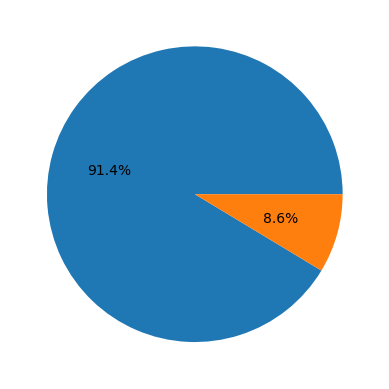

In [84]:
plt.pie(churn_percentages,autopct='%1.1f%%')
plt.show()

###### Observation:As we can see 91.4% of the customers donot churn, there is a class imbalance

##### Handling Outliers

##### Derive New Features

In [85]:
telecom_data_hv.head(20)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_avg_rech_amt,churn
7,7000701601,1069.180,1349.850,3171.480,57.840000,54.68,52.29,453.430000,567.16,325.91,16.230000,33.49,31.64,23.740000,12.59,38.06,51.39000,31.38,40.28,308.630000,447.38,162.28,62.130000,55.14,53.23,0.000000,0.0,0.00,422.160000,533.91,255.79,4.300000,23.29,12.01,49.890000,31.76,49.14,6.660000,20.08,16.68,60.860000,75.14,77.84,0.000000,0.18,10.01,4.500000,0.00,6.50,0.000000,0.0,0.0,487.53,609.24,350.16,58.140000,32.26,27.31,217.560000,221.49,121.19,152.160000,101.46,39.53,427.880000,355.23,188.04,36.890000,11.83,30.39,91.440000,126.99,141.33,52.19000,34.24,22.21,180.540000,173.08,193.94,626.46,558.04,428.74,0.210000,0.0,0.0,2.060000,14.53,31.59,15.740000,15.19,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.690000,351.03,35.08,94.660000,80.63,136.48,0.000000,0.00,0.00,0.000000,0.00,0.00,297.13000,217.59,12.49,80.960000,70.58,50.54,0.000000,0.00,0.00,0.000000,0.0,7.15,378.090000,288.18,63.04,116.560000,133.43,22.58,13.690000,10.04,75.69,0.000000,0.00,0.00,130.260000,143.48,98.28,0.000000,0.00,0.00,0.000000,0.00,10.23,0.000000,0.0,0.0,508.36,431.66,171.56,23.840000,9.84,0.31,57.580000,13.98,15.48,0.000000,0.00,0.00,81.430000,23.83,15.79,0.000000,0.58,0.10,22.430000,4.08,0.65,0.00000,0.00,0.00,22.430000,4.66,0.75,103.86,28.49,16.54,0.000000,0.0,0.0,0.000000,0.00,0.00,0.000000,0.00,0.00,19,21,14,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,492.846,205.671,593.260,501.760000,108.39,534.24,413.310000,119.28,482.46,23.530000,144.24,72.11,7.980000,35.26,1.44,49.63000,6.19,36.01,151.130000,47.28,294.46,4.540000,0.00,23.51,0.000000,0.0,0.49,205.310000,53.48,353.99,446.410000,85.98,498.23,255.360000,52.94,156.94,0.000000,0.00,0.00,701.780000,138.93,655.18,0.000000,0.00,1.29,0.000000,0.00,4.78,0.000000,0.0,0.0,907.09,192.41,1015.26,67.88

For deriving additional features, we need to determine the various benefits or packages availed by the user in the following 3 phases:
1. Good Phase (In June and July)
2. Action Phase (In August)
3. Churn Phase (In September), here a churn will be determined by zero usage.

Let's create these new features based on the above information

##### Deriving meaningul features for analysis
##### aon(age on network) is the column that is in days ,lets convert those to months which will be easier for analysis

In [86]:
aon_col=[col for col in telecom_data_hv.columns if 'aon' in col]
aon_col

['aon']

In [87]:
telecom_data_hv['aon'].head()

7      802
8      315
13    2607
16     511
17     667
Name: aon, dtype: int64

In [88]:
telecom_data_hv['aon_months']=(telecom_data_hv['aon']/30).round(0)
telecom_data_hv['aon_months'].head()

7     27.0
8     10.0
13    87.0
16    17.0
17    22.0
Name: aon_months, dtype: float64

##### we can bin those values, so that it will be easy for analysis

In [89]:
aon_range = [0, 6, 12, 24, 60, 61]
aon_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_data_hv['aon_range'] = pd.cut(telecom_data_hv['aon_months'], aon_range, labels=aon_label)
telecom_data_hv['aon_range'].value_counts()

aon_range
2-5 Yrs            9532
1-2 Yrs            7464
6-12 Months        4648
0-6 Months          496
5 Yrs and above     121
Name: count, dtype: int64

##### dropping the aon_months variable, as it might lead to multicollinearity

In [90]:
telecom_data_hv.shape

(30011, 137)

In [91]:
telecom_data_hv.drop('aon_months',axis=1,inplace=True)

In [92]:
telecom_data_hv.shape

(30011, 136)

In [93]:
def create_new_columns_and_drop_old(df):
    cols_to_drop = []
    
    for col in df.columns:
        # Look for columns ending with '_6'
        if '_6' in col:
            # Find the corresponding '_7' column
            col_7 = col.replace('_6', '_7')
            if col_7 in df.columns:
                # Check if the column name contains 'max'
                if 'max' in col:
                    # Create a new column with the maximum of _6 and _7
                    new_col_name = f'good_phase_{col.replace("_6", "")}_max'
                    df[new_col_name] = df[[col, col_7]].max(axis=1)
                else:
                    # Create a new column with the average of _6 and _7
                    new_col_name = f'good_phase_{col.replace("_6", "")}_avg'
                    df[new_col_name] = (df[col] + df[col_7]) / 2
                
                # Add _6 and _7 columns to the list for dropping later
                cols_to_drop.extend([col, col_7])
    
    # Drop the original _6 and _7 columns
    df.drop(columns=cols_to_drop, inplace=True)
    
    return df

In [94]:
telecom_data_hv = create_new_columns_and_drop_old(telecom_data_hv)
telecom_data_hv.head(20)

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_avg_rech_amt,churn,aon_range,good_phase_arpu_avg,good_phase_onnet_mou_avg,good_phase_offnet_mou_avg,good_phase_roam_ic_mou_avg,good_phase_roam_og_mou_avg,good_phase_loc_og_t2t_mou_avg,good_phase_loc_og_t2m_mou_avg,good_phase_loc_og_t2f_mou_avg,good_phase_loc_og_t2c_mou_avg,good_phase_loc_og_mou_avg,good_phase_std_og_t2t_mou_avg,good_phase_std_og_t2m_mou_avg,good_phase_std_og_t2f_mou_avg,good_phase_std_og_mou_avg,good_phase_isd_og_mou_avg,good_phase_spl_og_mou_avg,good_phase_og_others_avg,good_phase_total_og_mou_avg,good_phase_loc_ic_t2t_mou_avg,good_phase_loc_ic_t2m_mou_avg,good_phase_loc_ic_t2f_mou_avg,good_phase_loc_ic_mou_avg,good_phase_std_ic_t2t_mou_avg,good_phase_std_ic_t2m_mou_avg,good_phase_std_ic_t2f_mou_avg,good_phase_std_ic_mou_avg,good_phase_total_ic_mou_avg,good_phase_spl_ic_mou_avg,good_phase_isd_ic_mou_avg,good_phase_ic_others_avg,good_phase_total_rech_num_avg,good_phase_max_rech_amt_max,good_phase_last_day_rch_amt_avg,good_phase_total_rech_data_avg,good_phase_max_rech_data_max,good_phase_av_rech_amt_data_avg,good_phase_vol_2g_mb_avg,good_phase_vol_3g_mb_avg,good_phase_monthly_2g_avg,good_phase_sachet_2g_avg,good_phase_monthly_3g_avg,good_phase_sachet_3g_avg
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,2-5 Yrs,1209.5150,56.260000,510.295000,24.860000,18.165000,41.38500,378.005000,58.635000,0.00000,478.035000,13.795000,40.825000,13.370000,68.000000,0.090000,2.250000,0.000000,548.385,45.200000,219.525000,126.810000,391.555000,24.360000,109.215000,43.21500,176.810000,592.250,0.105000,8.295000,15.465000,5.0,1580,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,23.0,69.0,0.03,11.94,0,3,0,0,315,21.03,910.65,122.16,0.0,519.0,0,6-12 Months,435.4720,382.360000,87.645000,0.000000,0.000000,257.36000,75.770000,0.000000,0.00000,333.135000,124.995000,11.865000,0.000000,136.870000,0.000000,0.000000,0.000000,470.010,16.840000,35.780000,0.000000,52.630000,0.290000,13.255000,0.00000,13.545000,66.175,0.000000,0.000000,0.000000,20.0,154,25.0,1.0,154.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,3.0,23.0,69.0,0.02,0.00,0,3,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,NaN,349.2585,305.075000,266.295000,83.885000,21.620000,27.91000,99.205000,2.270000,0.00000,129.395000,266.195000,154.150000,0.000000,420.355000,0.000000,0.000000,0.000000,549.750,37.730000,80.705000,2.405000,120.845000,76.985000,168.960000,0.00000,245.950000,570.595,0.225000,153.695000,49.860000,5.0,110,80.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.0,0.0,0.0,0.00,

In [95]:
telecom_data_hv.shape

(30011, 94)

##### Deriving the next features arpu_(average revenue per user) for good phase to check  whether the average revenue per customer has decreased in the action phase than the good phase.


In [96]:
arpu_col=[col for col in telecom_data_hv.columns if 'arpu' in col]
arpu_col

['arpu_8', 'good_phase_arpu_avg']

In [97]:
telecom_data_hv['good_phase_arpu_avg'].head()

7     1209.5150
8      435.4720
13     349.2585
16     365.4220
17     354.4940
Name: good_phase_arpu_avg, dtype: float64

In [98]:
telecom_data_hv['difference_arpu'] = telecom_data_hv['arpu_8'] - telecom_data_hv['good_phase_arpu_avg']

In [99]:
telecom_data_hv['decrease_arpu_action'] = np.where(telecom_data_hv['difference_arpu'] < 0, 1, 0)

In [100]:
telecom_data_hv[['arpu_8','good_phase_arpu_avg','difference_arpu','decrease_arpu_action']].head()

,arpu_8,good_phase_arpu_avg,difference_arpu,decrease_arpu_action
7,3171.480,1209.5150,1961.9650,0
8,137.362,435.4720,-298.1100,1
13,593.260,349.2585,244.0015,0
16,187.894,365.4220,-177.5280,1
17,25.499,354.4940,-328.9950,1


##### Deriving the next feature mou_(minutes of usage) for good phase to check  whether the total minutes of usage has decreased in the action phase than the good phase.

In [101]:
mou_col=[col for col in telecom_data_hv.columns if 'total_' in col]
mou_col

['total_og_mou_8',
 'total_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'total_rech_data_8',
 'good_phase_total_og_mou_avg',
 'good_phase_total_ic_mou_avg',
 'good_phase_total_rech_num_avg',
 'good_phase_total_rech_data_avg']

In [102]:
telecom_data_hv[['good_phase_total_ic_mou_avg','good_phase_total_og_mou_avg']].head()

,good_phase_total_ic_mou_avg,good_phase_total_og_mou_avg
7,592.250,548.385
8,66.175,470.010
13,570.595,549.750
16,373.210,316.410
17,47.095,625.170


In [103]:
telecom_data_hv['total_mou_8']=telecom_data_hv['total_og_mou_8']+telecom_data_hv['total_ic_mou_8']

In [104]:
telecom_data_hv['good_phase_total_mou']=((telecom_data_hv['good_phase_total_ic_mou_avg']+telecom_data_hv['good_phase_total_og_mou_avg'])/2).round(2)

In [105]:
telecom_data_hv['good_phase_total_mou'].head(10)

7     570.32
8     268.09
13    560.17
16    344.81
17    336.13
21    557.03
24    440.78
33      3.77
38    286.78
41    368.24
Name: good_phase_total_mou, dtype: float64

##### Creating new variable to find out if there is decrease in mou(minutes of usage) between good phase and action phase

In [106]:
telecom_data_hv['difference_mou']=telecom_data_hv['total_mou_8']-telecom_data_hv['good_phase_total_mou']

In [107]:
telecom_data_hv['decrease_mou_action']=np.where((telecom_data_hv['difference_mou'] < 0), 1, 0)

In [108]:
telecom_data_hv['decrease_mou_action'].head()

7     0
8     1
13    0
16    0
17    1
Name: decrease_mou_action, dtype: int64

##### Deriving the next feature  decrease in rech_amt_(count of recharge) for good phase to check  whether the total recharge count has decreased in the action phase than the good phase.

In [109]:
rech_col=[col for col in telecom_data_hv.columns if 'rech_' in col]
rech_col

['total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'good_phase_avg_rech_amt',
 'good_phase_total_rech_num_avg',
 'good_phase_max_rech_amt_max',
 'good_phase_total_rech_data_avg',
 'good_phase_max_rech_data_max',
 'good_phase_av_rech_amt_data_avg']

In [110]:
telecom_data_hv['avg_rech_amt_good']=telecom_data_hv['good_phase_avg_rech_amt']

In [111]:
telecom_data_hv['difference_rech_amt'] = telecom_data_hv['total_rech_amt_8'] - telecom_data_hv['good_phase_avg_rech_amt']

In [112]:
telecom_data_hv['decrease_rech_amt_action'] = np.where((telecom_data_hv['difference_rech_amt'] < 0), 1, 0) 

In [113]:
telecom_data_hv['decrease_rech_amt_action'].head()

7     0
8     1
13    0
16    1
17    1
Name: decrease_rech_amt_action, dtype: int64

##### Deriving the next feature  decrease in vbc(volume based charging-the amount of data usage that was charged based on the volume consumed usually in MB or GB) for good phase to check  whether the amount of date used has decreased in the action phase than the good phase.

In [114]:
vbc_col=[col for col in telecom_data_hv.columns if 'vbc' in col]
vbc_col

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [115]:
telecom_data_hv[vbc_col].head()

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,57.74,19.38,18.74,0.0
8,21.03,910.65,122.16,0.0
13,0.00,0.00,0.00,0.0
16,0.00,2.45,21.89,0.0
17,0.00,0.00,0.00,0.0


In [116]:
telecom_data_hv['vbc_good']=((telecom_data_hv['jun_vbc_3g']+telecom_data_hv['jul_vbc_3g'])/2).round(2)

In [117]:
telecom_data_hv['difference_vbc']=telecom_data_hv['aug_vbc_3g']-telecom_data_hv['vbc_good']

In [118]:
telecom_data_hv['decrease_vbc_action'] = np.where(telecom_data_hv['difference_vbc'] < 0 , 1, 0)

In [119]:
telecom_data_hv.drop(['sep_vbc_3g'],axis=1,inplace=True)
telecom_data_hv.shape

(30011, 105)

### Exploratory Data Analysis

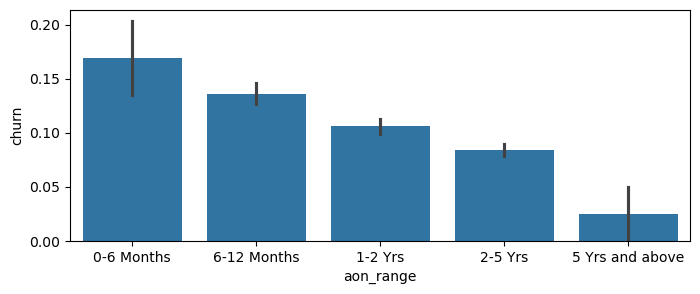

In [120]:
plt.figure(figsize=(8,3))
sns.barplot(x='aon_range',y='churn', data=telecom_data_hv)
plt.show()

##### Observation: We can see customers in 0-6 months tend to churn more and it gradually decreases as the customers tend to retain the network

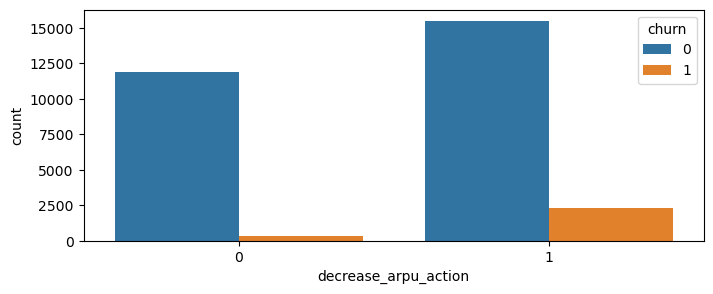

In [121]:
plt.figure(figsize=(8,3))
sns.countplot(x=telecom_data_hv['decrease_arpu_action'], hue=telecom_data_hv['churn'])
plt.show()

##### Observation: We can see that when there is decrease in revenue in action phase, the churn rate is higher

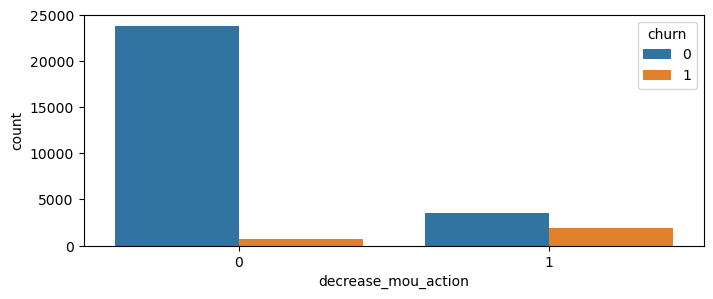

In [122]:
plt.figure(figsize=(8,3))
sns.countplot(x=telecom_data_hv['decrease_mou_action'], hue=telecom_data_hv['churn'])
plt.show()

##### Obseration: We can see that when there is a decrease in minutes of usage in action phase , the churn rate is higher

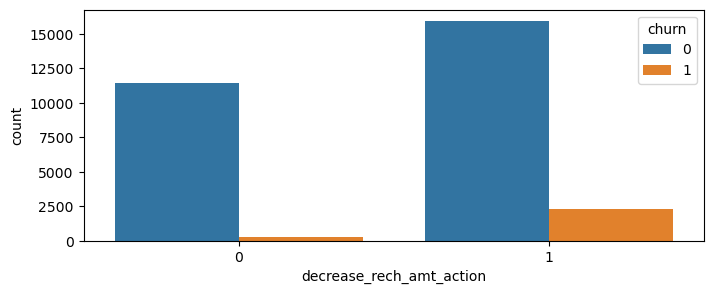

In [123]:
plt.figure(figsize=(8,3))
sns.countplot(x=telecom_data_hv['decrease_rech_amt_action'], hue=telecom_data_hv['churn'])
plt.show()

##### Observation:We can see that when there is decrease in the amount of recharge in action phase , the churn rate is higher


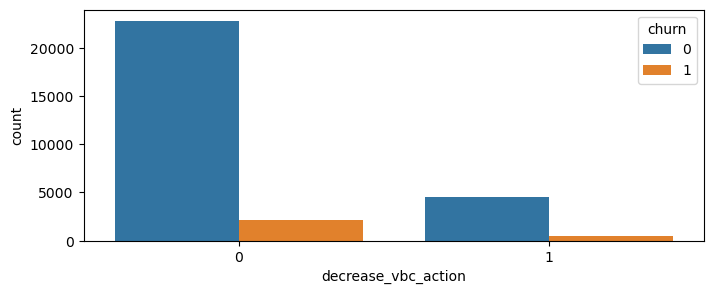

In [124]:
plt.figure(figsize=(8,3))
sns.countplot(x=telecom_data_hv['decrease_vbc_action'], hue=telecom_data_hv['churn'])
plt.show()

##### Observation: We can see that the churn rate is more for customers whose volume based cost in action phase is more. 

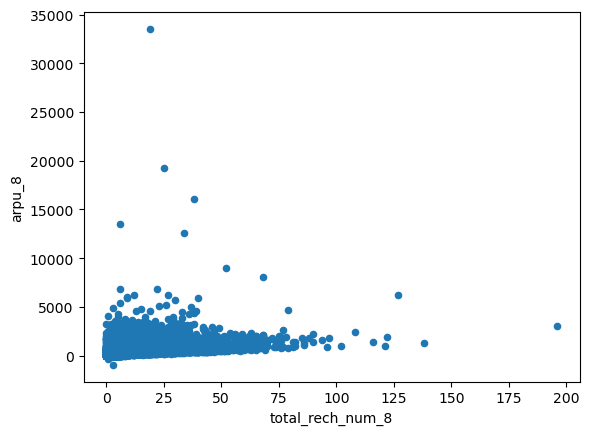

In [125]:
# scatter plot between total recharge and avg revenue
telecom_data_hv[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

##### Observation: There is no clear trend between total_rech_num_8 and arpu_8

In [126]:
# Creating categories for month 8 column totalrecharge and their count

telecom_data_hv['total_rech_data_group_8']= pd.cut(telecom_data_hv['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
telecom_data_hv['total_rech_num_group_8'] = pd.cut(telecom_data_hv['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 total_rech_data_group_8
No_Recharge        18257
<=10_Recharges     11468
10-25_Recharges      256
>25_Recharges         30
Name: count, dtype: int64


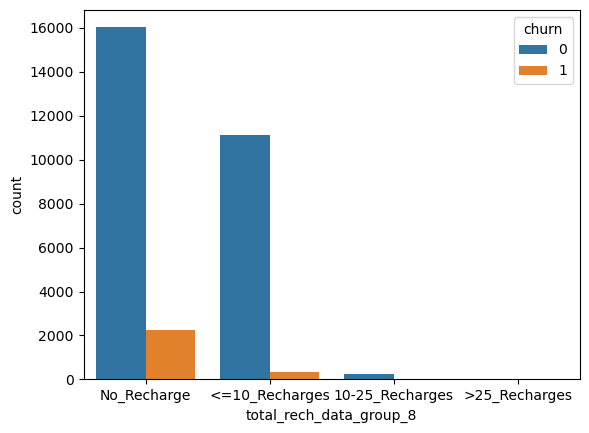

					Distribution of total_rech_num_8 variable
 total_rech_num_group_8
<=10_Recharges     19130
10-25_Recharges     8326
>25_Recharges       1961
No_Recharge          594
Name: count, dtype: int64


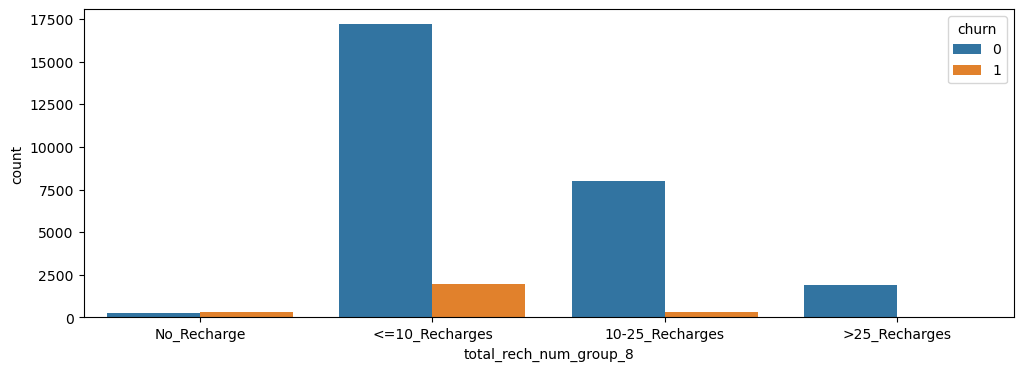

In [128]:
figsize=[12,4]
sns.countplot(data=telecom_data_hv,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",telecom_data_hv['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=telecom_data_hv,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",telecom_data_hv['total_rech_num_group_8'].value_counts())
plt.show()

#### Observation: As the number of recharge increases, churn rate decreases

In [129]:
telecom_data_hv.drop(['total_rech_data_group_8','total_rech_num_group_8'],axis=1,inplace=True)

In [130]:
telecom_data_hv.dtypes

mobile_number                         int64
arpu_8                              float64
onnet_mou_8                         float64
offnet_mou_8                        float64
roam_ic_mou_8                       float64
roam_og_mou_8                       float64
loc_og_t2t_mou_8                    float64
loc_og_t2m_mou_8                    float64
loc_og_t2f_mou_8                    float64
loc_og_t2c_mou_8                    float64
loc_og_mou_8                        float64
std_og_t2t_mou_8                    float64
std_og_t2m_mou_8                    float64
std_og_t2f_mou_8                    float64
std_og_mou_8                        float64
isd_og_mou_8                        float64
spl_og_mou_8                        float64
og_others_8                         float64
total_og_mou_8                      float64
loc_ic_t2t_mou_8                    float64
loc_ic_t2m_mou_8                    float64
loc_ic_t2f_mou_8                    float64
loc_ic_mou_8                    

In [131]:
telecom_data_hv['churn']=telecom_data_hv['churn'].astype(object)

In [132]:
telecom_data_hv.dtypes

mobile_number                         int64
arpu_8                              float64
onnet_mou_8                         float64
offnet_mou_8                        float64
roam_ic_mou_8                       float64
roam_og_mou_8                       float64
loc_og_t2t_mou_8                    float64
loc_og_t2m_mou_8                    float64
loc_og_t2f_mou_8                    float64
loc_og_t2c_mou_8                    float64
loc_og_mou_8                        float64
std_og_t2t_mou_8                    float64
std_og_t2m_mou_8                    float64
std_og_t2f_mou_8                    float64
std_og_mou_8                        float64
isd_og_mou_8                        float64
spl_og_mou_8                        float64
og_others_8                         float64
total_og_mou_8                      float64
loc_ic_t2t_mou_8                    float64
loc_ic_t2m_mou_8                    float64
loc_ic_t2f_mou_8                    float64
loc_ic_mou_8                    

##### Removing the derived columns which are not needed for further analysis

In [133]:
col_drop=['aon_range','good_phase_arpu_avg','good_phase_total_mou','difference_mou','difference_rech_amt','good_phase_avg_rech_amt','vbc_good','difference_vbc','good_phase_avg_rech_amt','difference_arpu']

In [134]:
telecom_data_hv.shape

(30011, 105)

In [135]:
telecom_data_hv.drop(col_drop,axis=1,inplace=True)

In [136]:
telecom_data_hv.shape

(30011, 96)

##### Checking for Multicollinearity

In [137]:
# Filter correlations above a certain threshold (absolute value > 0.8)
corr_data=telecom_data_hv.drop(['mobile_number'],axis=1)
correlation_matrix = corr_data.corr()
threshold = 0.8
high_corr_pairs = correlation_matrix[correlation_matrix.abs() > threshold].stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
print(high_corr_pairs)

                             level_0                          level_1  \
1                             arpu_8                 total_rech_amt_8   
3                        onnet_mou_8                 std_og_t2t_mou_8   
5                       offnet_mou_8                 std_og_t2m_mou_8   
7                      roam_ic_mou_8                    roam_og_mou_8   
8                      roam_og_mou_8                    roam_ic_mou_8   
11                  loc_og_t2t_mou_8                     loc_og_mou_8   
13                  loc_og_t2m_mou_8                     loc_og_mou_8   
16                      loc_og_mou_8                 loc_og_t2t_mou_8   
17                      loc_og_mou_8                 loc_og_t2m_mou_8   
19                  std_og_t2t_mou_8                      onnet_mou_8   
21                  std_og_t2m_mou_8                     offnet_mou_8   
25                      std_og_mou_8                   total_og_mou_8   
27                      isd_og_mou_8        good_ph

In [138]:
# Calculate the correlation matrix
correlation_matrix = corr_data.corr().abs()  # Take absolute value of correlations

# Set a threshold for dropping highly correlated features
correlation_threshold = 0.8

# Create a mask to identify the upper triangle of the correlation matrix (no redundancy)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find index pairs where correlation is greater than the threshold
columns_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

# Print the columns to drop
print(f"Columns to drop due to high correlation (threshold > {correlation_threshold}):\n", columns_to_drop)

Columns to drop due to high correlation (threshold > 0.8):
 ['roam_og_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_amt_8', 'av_rech_amt_data_8', 'vol_3g_mb_8', 'sachet_2g_8', 'good_phase_std_og_t2t_mou_avg', 'good_phase_std_og_t2m_mou_avg', 'good_phase_isd_og_mou_avg', 'good_phase_total_og_mou_avg', 'good_phase_loc_ic_mou_avg', 'good_phase_std_ic_mou_avg', 'good_phase_total_ic_mou_avg', 'good_phase_vol_3g_mb_avg', 'good_phase_sachet_2g_avg', 'total_mou_8']


In [139]:
telecom_data_hv.shape

(30011, 96)

In [140]:
telecom_data_hv.drop(columns_to_drop,axis=1,inplace=True)

In [141]:
telecom_data_hv.shape

(30011, 75)

In [142]:
corr_data=telecom_data_hv.drop(['mobile_number'],axis=1)
correlation_matrix = corr_data.corr()
threshold = 0.8
high_corr_pairs = correlation_matrix[correlation_matrix.abs() > threshold].stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
print(high_corr_pairs)

Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []


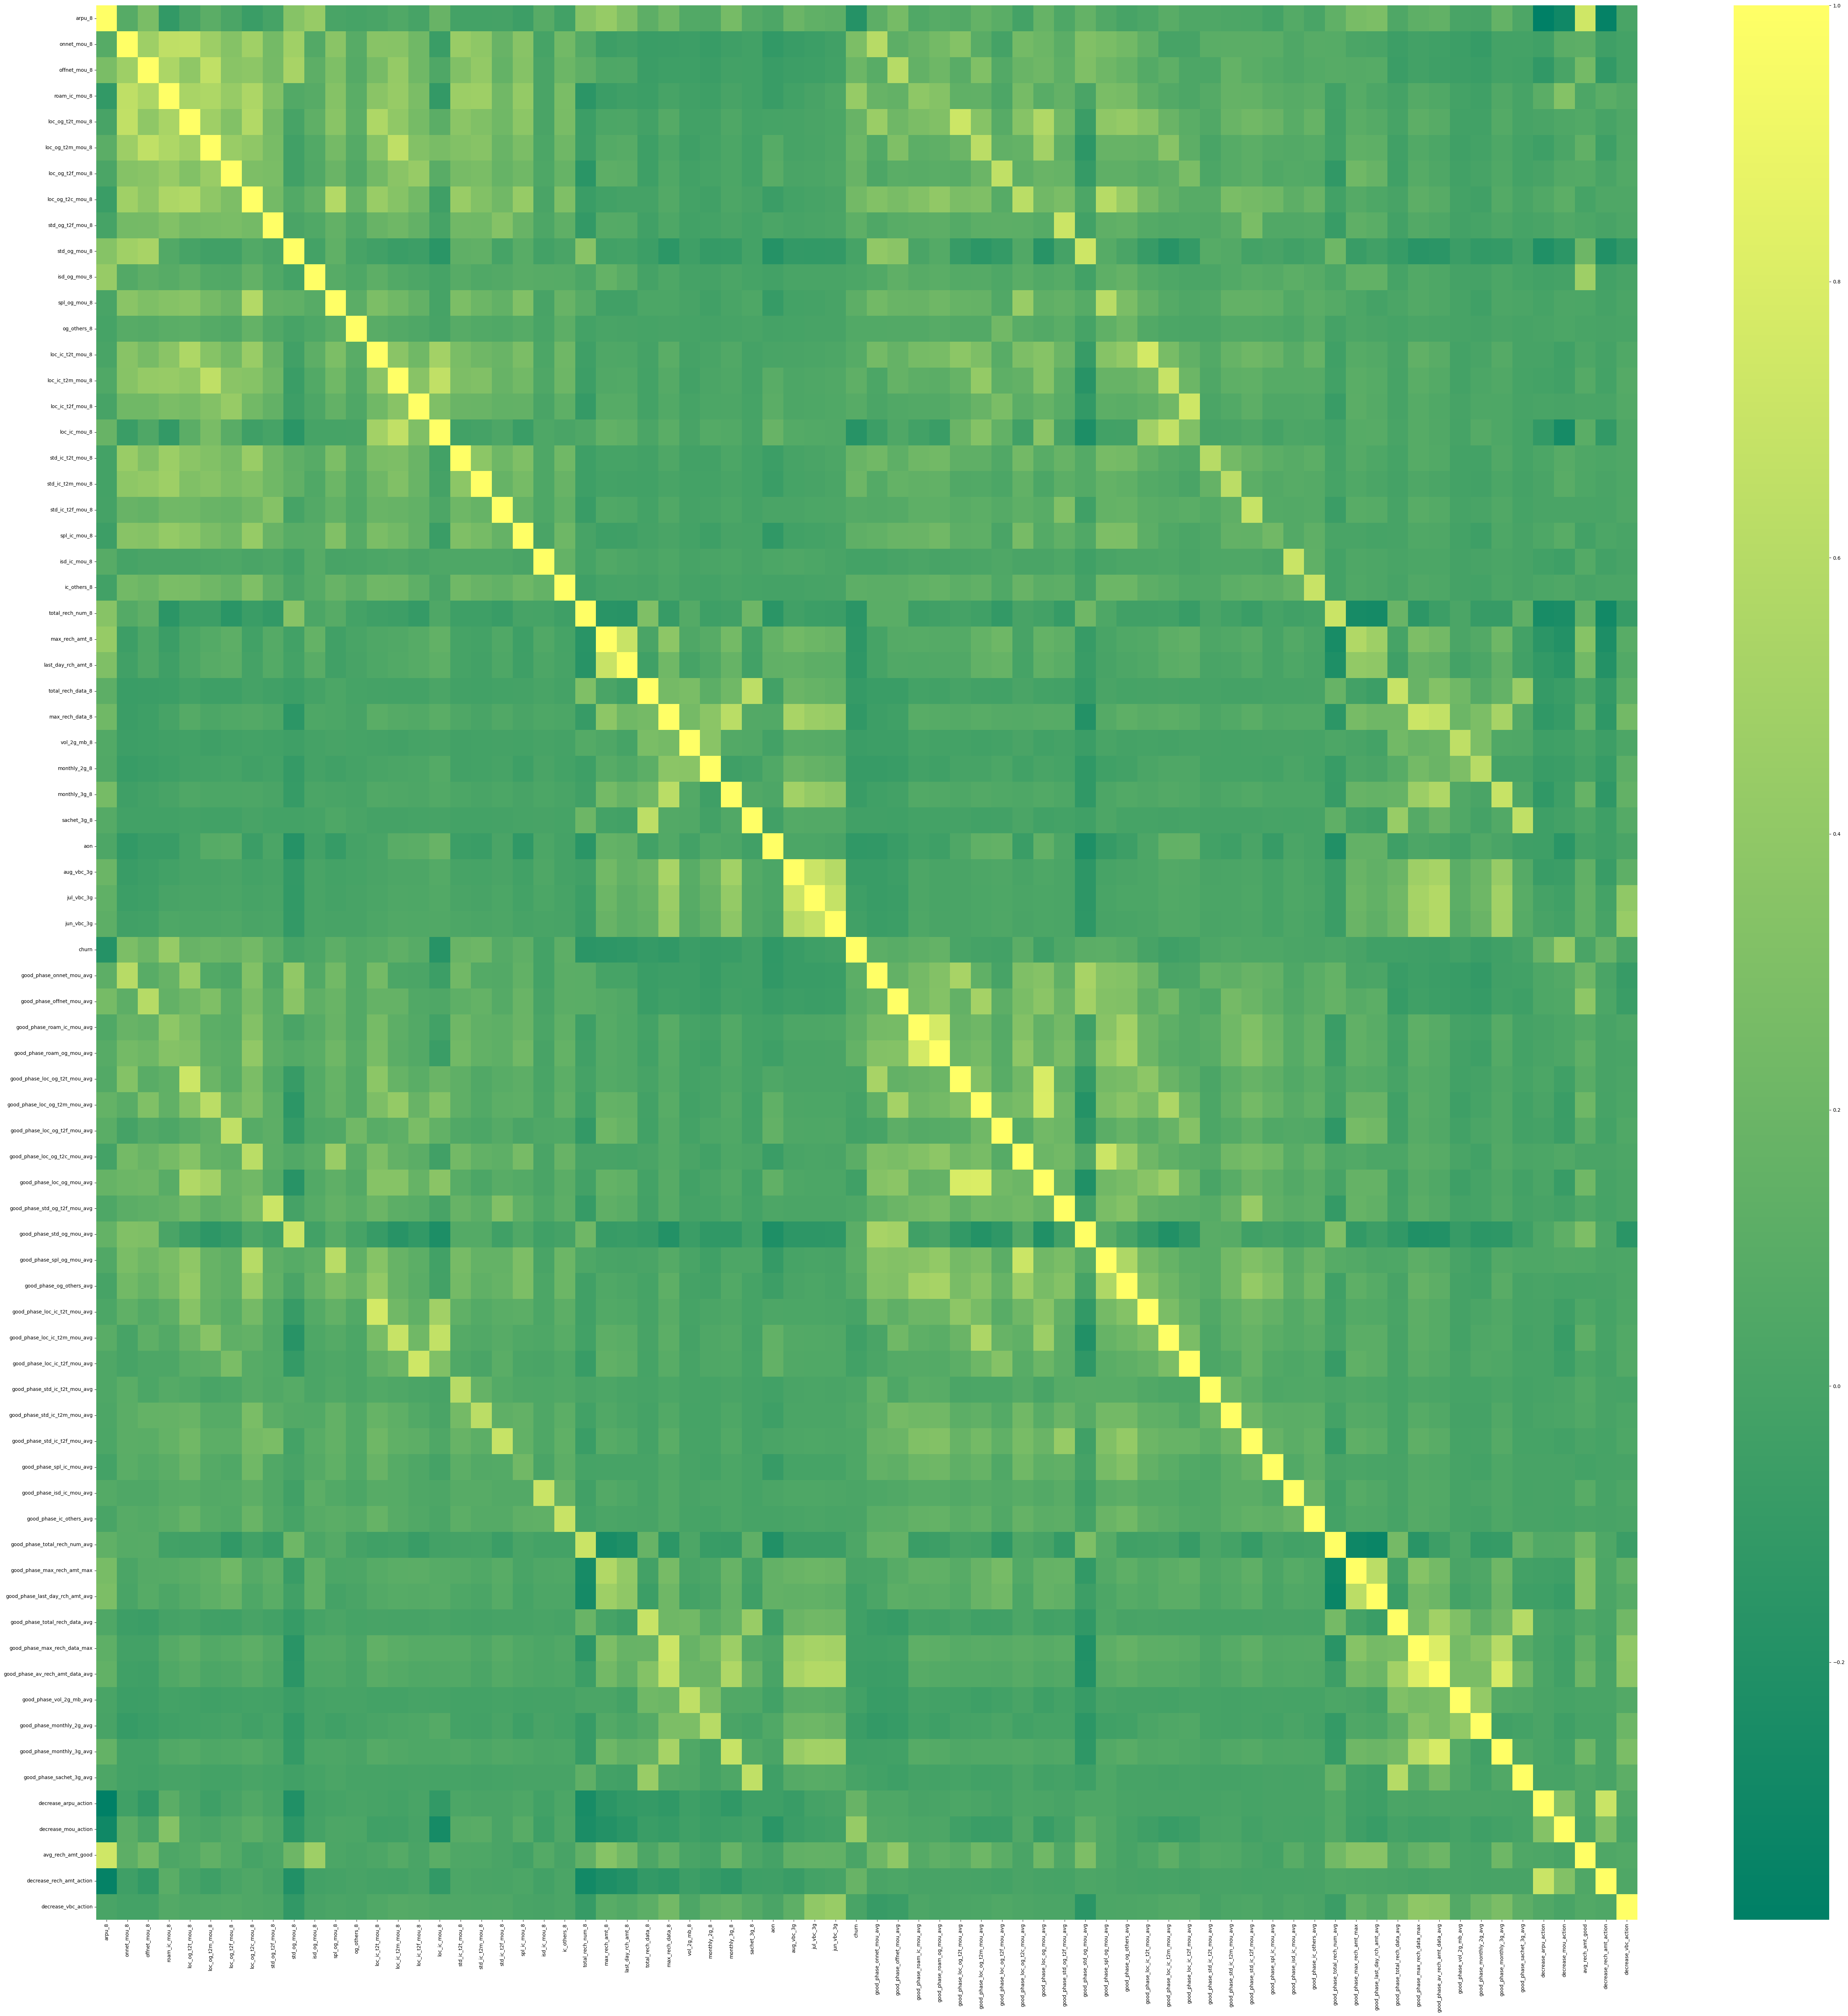

In [143]:
plt.figure(figsize=(70,70))
sns.heatmap(corr_data.corr(),annot=False, 
                                cmap='summer')
plt.show()

Observation: There is no multicollinearity

##### Train-Test Split

In [144]:
y=telecom_data_hv['churn'].astype(int)

In [145]:
X = telecom_data_hv.drop(['mobile_number','churn'], axis=1)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

##### Dealing with class imbalance(SMOTE)

In [147]:
sm = SMOTE(random_state=27)

In [148]:
y_train=y_train.astype(int)

In [149]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [150]:
X_train = pd.DataFrame(X_train, columns=X_train.columns)

##### Feature Scaling

In [151]:
scaler = StandardScaler()

In [152]:
X_train_scaled = scaler.fit_transform(X_train)

In [153]:
X_test_scaled = scaler.transform(X_test)

In [154]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

### Model 1 : Logistic Regression(with RFE)

In [155]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [156]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=30)          
rfe = rfe.fit(X_train, y_train)

In [157]:
# Get selected features
selected_features =X_train.columns[rfe.support_]
ranking = rfe.ranking_

selected_features_df = df = pd.DataFrame(list(zip(selected_features, ranking)), columns=['Selected Features', 'Ranking'])
selected_features_df.sort_values(by='Ranking', ascending=True)

,Selected Features,Ranking
14,last_day_rch_amt_8,1
25,good_phase_monthly_3g_avg,1
23,good_phase_loc_ic_t2m_mou_avg,1
20,good_phase_loc_og_mou_avg,1
18,aon,1
17,sachet_3g_8,1
16,monthly_3g_8,1
13,total_rech_num_8,1
9,loc_ic_mou_8,1
29,decrease_vbc_action,1


### Training with the new feature list

In [158]:
import statsmodels.api as stm

def build_rfe_log_model(X_train, y_train):
    logm = stm.GLM(y_train,X_train, family = stm.families.Binomial())
    res = logm.fit()
    return res

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, f):
    vif = pd.DataFrame()
    vif['Features'] = df[f].columns
    vif['VIF'] = [variance_inflation_factor(df[f].values, i) for i in range(df[f].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [160]:
X_train_rfe = stm.add_constant(X_train[selected_features])
res = build_rfe_log_model(X_train_rfe, y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43896
Model:                            GLM   Df Residuals:                    43865
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16163.
Date:                Sat, 12 Oct 2024   Deviance:                       32325.
Time:                        20:25:15   Pearson chi2:                 5.73e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4779
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.1031      0.023     -4.475      0.000      -0.148      -0.058
onnet_mou_8                       1.5848      0.108     14.684      0.000       1.373       1.796
offnet_mou_8                      1.1304      0.092     12.286      0.000       0.950       1.311
roam_ic_mou_8                     0.5542      0.069      8.004      0.000       0.419       0.690
loc_og_t2t_mou_8                 -1.6043      0.090    -17.804      0.000      -1.781      -1.428
loc_og_t2m_mou_8                 -1.2021      0.103    -11.639      0.000      -1.404      -1.000
loc_og_t2c_mou_8                  0.3212      0.057      5.650      0.000       0.210       0.433
std_og_mou_8                     -1.2690      0.060    -21.042      0.000      -1.387      -1.151
loc_ic_t2t_mou_8                  0.3969      0.059      6.776      0.000       0.282       0.512
loc_ic_t2m_mou_8                  1.5232      0.111     13.725      0.000       1.306       1.741
loc_ic_mou_8                     -2.4193      0.067    -36.081      0.000      -2.551      -2.288
std_ic_t2t_mou_8                 -0.3037      0.046     -6.542      0.000      -0.395      -0.213
std_ic_t2m_mou_8                 -0.3134      0.043     -7.262      0.000      -0.398      -0.229
spl_ic_mou_8                     -0.6330      0.034    -18.750      0.000      -0.699      -0.567
total_rech_num_8                 -0.8634      0.029    -29.584      0.000      -0.921      -0.806
last_day_rch_amt_8               -0.4728      0.020    -23.962      0.000      -0.512      -0.434
monthly_2g_8                     -0.8308      0.040    -20.924      0.000      -0.909      -0.753
monthly_3g_8                     -1.0472      0.042    -25.127      0.000      -1.129      -0.966
sachet_3g_8                      -0.3390      0.036     -9.534      0.000      -0.409      -0.269
aon                              -0.2980      0.016    -18.966      0.000      -0.329      -0.267
good_phase_loc_og_t2t_mou_avg     0.3712      0.049      7.595      0.000       0.275       0.467
good_phase_loc_og_mou_avg        -0.3011      0.049     -6.085      0.000      -0.398      -0.204
good_phase_std_og_mou_avg         0.3468      0.026     13.136      0.000       0.295       0.399
good_phase_loc_ic_t2t_mou_avg     0.3783      0.035     10.892      0.000       0.310       0.446
good_phase_loc_ic_t2m_mou_avg     0.5533      0.037     14.885      0.000       0.480       0.626
good_phase_total_rech_num_avg     0.4398      0.025     17.792      0.000       0.391       0.488
good_phase_monthly_3g_avg         0.3485      0.025     14.085      0.000       0.300       0.397
good_phase_sachet_3g_avg          0.2294      0.026      8.695      0.000       0.178       0.281
avg_rech_amt_good                 0.2702     

In [161]:
vif = calculate_vif(X_train_rfe, selected_features)
vif

,Features,VIF
0,onnet_mou_8,26.79
4,loc_og_t2m_mou_8,22.64
1,offnet_mou_8,22.54
2,roam_ic_mou_8,13.59
8,loc_ic_t2m_mou_8,12.01
3,loc_og_t2t_mou_8,11.64
6,std_og_mou_8,9.18
20,good_phase_loc_og_mou_avg,7.63
19,good_phase_loc_og_t2t_mou_avg,7.05
7,loc_ic_t2t_mou_8,5.55


In [162]:
features = list(selected_features)
features

['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2c_mou_8',
 'std_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'monthly_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'good_phase_loc_og_t2t_mou_avg',
 'good_phase_loc_og_mou_avg',
 'good_phase_std_og_mou_avg',
 'good_phase_loc_ic_t2t_mou_avg',
 'good_phase_loc_ic_t2m_mou_avg',
 'good_phase_total_rech_num_avg',
 'good_phase_monthly_3g_avg',
 'good_phase_sachet_3g_avg',
 'avg_rech_amt_good',
 'decrease_rech_amt_action',
 'decrease_vbc_action']

##### Removing onnet_mou_8 since it has high VIF

In [163]:
features.remove('onnet_mou_8')

In [164]:
features

['offnet_mou_8',
 'roam_ic_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2c_mou_8',
 'std_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'monthly_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'good_phase_loc_og_t2t_mou_avg',
 'good_phase_loc_og_mou_avg',
 'good_phase_std_og_mou_avg',
 'good_phase_loc_ic_t2t_mou_avg',
 'good_phase_loc_ic_t2m_mou_avg',
 'good_phase_total_rech_num_avg',
 'good_phase_monthly_3g_avg',
 'good_phase_sachet_3g_avg',
 'avg_rech_amt_good',
 'decrease_rech_amt_action',
 'decrease_vbc_action']

In [165]:
X_train_rfe = stm.add_constant(X_train[features])
res = build_rfe_log_model(X_train_rfe, y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43896
Model:                            GLM   Df Residuals:                    43866
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16265.
Date:                Sat, 12 Oct 2024   Deviance:                       32531.
Time:                        20:25:26   Pearson chi2:                 2.46e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4754
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.1541      0.022     -7.039      0.000      -0.197      -0.111
offnet_mou_8                     -0.0024      0.049     -0.050      0.960      -0.099       0.094
roam_ic_mou_8                     1.2339      0.064     19.389      0.000       1.109       1.359
loc_og_t2t_mou_8                 -1.1571      0.086    -13.377      0.000      -1.327      -0.988
loc_og_t2m_mou_8                 -0.2639      0.075     -3.514      0.000      -0.411      -0.117
loc_og_t2c_mou_8                  0.2038      0.053      3.826      0.000       0.099       0.308
std_og_mou_8                     -0.4943      0.029    -16.976      0.000      -0.551      -0.437
loc_ic_t2t_mou_8                  0.3775      0.059      6.372      0.000       0.261       0.494
loc_ic_t2m_mou_8                  1.8586      0.106     17.575      0.000       1.651       2.066
loc_ic_mou_8                     -2.6205      0.067    -39.114      0.000      -2.752      -2.489
std_ic_t2t_mou_8                 -0.2663      0.045     -5.908      0.000      -0.355      -0.178
std_ic_t2m_mou_8                 -0.2491      0.039     -6.330      0.000      -0.326      -0.172
spl_ic_mou_8                     -0.6151      0.033    -18.719      0.000      -0.680      -0.551
total_rech_num_8                 -0.8691      0.029    -29.894      0.000      -0.926      -0.812
last_day_rch_amt_8               -0.4646      0.021    -21.669      0.000      -0.507      -0.423
monthly_2g_8                     -0.8421      0.040    -21.051      0.000      -0.920      -0.764
monthly_3g_8                     -1.0792      0.043    -25.304      0.000      -1.163      -0.996
sachet_3g_8                      -0.3338      0.036     -9.353      0.000      -0.404      -0.264
aon                              -0.3026      0.016    -19.267      0.000      -0.333      -0.272
good_phase_loc_og_t2t_mou_avg     0.4761      0.048      9.848      0.000       0.381       0.571
good_phase_loc_og_mou_avg        -0.4012      0.048     -8.349      0.000      -0.495      -0.307
good_phase_std_og_mou_avg         0.3225      0.026     12.307      0.000       0.271       0.374
good_phase_loc_ic_t2t_mou_avg     0.3829      0.035     11.024      0.000       0.315       0.451
good_phase_loc_ic_t2m_mou_avg     0.5045      0.036     13.851      0.000       0.433       0.576
good_phase_total_rech_num_avg     0.4434      0.025     17.979      0.000       0.395       0.492
good_phase_monthly_3g_avg         0.3353      0.025     13.488      0.000       0.287       0.384
good_phase_sachet_3g_avg          0.2251      0.027      8.486      0.000       0.173       0.277
avg_rech_amt_good                 0.3194      0.022     14.827      0.000       0.277       0.362
decrease_rech_amt_action         -0.3184     

##### Removing offnet_mou_8 since it has high p-value

In [166]:
features.remove('offnet_mou_8')

In [167]:
X_train_rfe = stm.add_constant(X_train[features])
res = build_rfe_log_model(X_train_rfe, y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43896
Model:                            GLM   Df Residuals:                    43867
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16265.
Date:                Sat, 12 Oct 2024   Deviance:                       32531.
Time:                        20:25:27   Pearson chi2:                 2.47e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4754
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.1541      0.022     -7.039      0.000      -0.197      -0.111
roam_ic_mou_8                     1.2334      0.063     19.632      0.000       1.110       1.357
loc_og_t2t_mou_8                 -1.1572      0.086    -13.381      0.000      -1.327      -0.988
loc_og_t2m_mou_8                 -0.2652      0.071     -3.761      0.000      -0.403      -0.127
loc_og_t2c_mou_8                  0.2038      0.053      3.826      0.000       0.099       0.308
std_og_mou_8                     -0.4950      0.026    -18.871      0.000      -0.546      -0.444
loc_ic_t2t_mou_8                  0.3775      0.059      6.372      0.000       0.261       0.494
loc_ic_t2m_mou_8                  1.8584      0.106     17.588      0.000       1.651       2.065
loc_ic_mou_8                     -2.6204      0.067    -39.152      0.000      -2.752      -2.489
std_ic_t2t_mou_8                 -0.2660      0.045     -5.938      0.000      -0.354      -0.178
std_ic_t2m_mou_8                 -0.2494      0.039     -6.393      0.000      -0.326      -0.173
spl_ic_mou_8                     -0.6152      0.033    -18.761      0.000      -0.679      -0.551
total_rech_num_8                 -0.8692      0.029    -29.943      0.000      -0.926      -0.812
last_day_rch_amt_8               -0.4646      0.021    -21.670      0.000      -0.507      -0.423
monthly_2g_8                     -0.8421      0.040    -21.051      0.000      -0.920      -0.764
monthly_3g_8                     -1.0792      0.043    -25.306      0.000      -1.163      -0.996
sachet_3g_8                      -0.3338      0.036     -9.353      0.000      -0.404      -0.264
aon                              -0.3025      0.016    -19.270      0.000      -0.333      -0.272
good_phase_loc_og_t2t_mou_avg     0.4762      0.048      9.851      0.000       0.381       0.571
good_phase_loc_og_mou_avg        -0.4012      0.048     -8.351      0.000      -0.495      -0.307
good_phase_std_og_mou_avg         0.3226      0.026     12.309      0.000       0.271       0.374
good_phase_loc_ic_t2t_mou_avg     0.3830      0.035     11.025      0.000       0.315       0.451
good_phase_loc_ic_t2m_mou_avg     0.5046      0.036     13.852      0.000       0.433       0.576
good_phase_total_rech_num_avg     0.4435      0.025     17.986      0.000       0.395       0.492
good_phase_monthly_3g_avg         0.3353      0.025     13.490      0.000       0.287       0.384
good_phase_sachet_3g_avg          0.2251      0.027      8.486      0.000       0.173       0.277
avg_rech_amt_good                 0.3193      0.021     14.909      0.000       0.277       0.361
decrease_rech_amt_action         -0.3184      0.017    -18.228      0.000      -0.353      -0.284
decrease_vbc_action              -0.3751     

In [168]:
vif = calculate_vif(X_train, features)
vif

,Features,VIF
6,loc_ic_t2m_mou_8,11.41
2,loc_og_t2m_mou_8,10.54
1,loc_og_t2t_mou_8,9.40
0,roam_ic_mou_8,8.12
18,good_phase_loc_og_mou_avg,7.41
17,good_phase_loc_og_t2t_mou_avg,6.84
5,loc_ic_t2t_mou_8,5.54
7,loc_ic_mou_8,4.63
8,std_ic_t2t_mou_8,3.22
9,std_ic_t2m_mou_8,3.15


In [169]:
features.remove('loc_ic_t2m_mou_8')

In [170]:
X_train_rfe = stm.add_constant(X_train[features])
res = build_rfe_log_model(X_train_rfe, y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43896
Model:                            GLM   Df Residuals:                    43868
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16437.
Date:                Sat, 12 Oct 2024   Deviance:                       32875.
Time:                        20:25:36   Pearson chi2:                 1.99e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4713
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.1927      0.021     -9.201      0.000      -0.234      -0.152
roam_ic_mou_8                     1.6413      0.063     26.182      0.000       1.518       1.764
loc_og_t2t_mou_8                 -0.5226      0.072     -7.274      0.000      -0.663      -0.382
loc_og_t2m_mou_8                  0.3287      0.058      5.710      0.000       0.216       0.442
loc_og_t2c_mou_8                  0.2924      0.051      5.729      0.000       0.192       0.392
std_og_mou_8                     -0.4494      0.026    -17.419      0.000      -0.500      -0.399
loc_ic_t2t_mou_8                  0.0206      0.056      0.367      0.713      -0.089       0.131
loc_ic_mou_8                     -1.8510      0.048    -38.313      0.000      -1.946      -1.756
std_ic_t2t_mou_8                 -0.1605      0.040     -4.059      0.000      -0.238      -0.083
std_ic_t2m_mou_8                 -0.1694      0.034     -4.920      0.000      -0.237      -0.102
spl_ic_mou_8                     -0.5427      0.031    -17.744      0.000      -0.603      -0.483
total_rech_num_8                 -0.9264      0.029    -31.826      0.000      -0.983      -0.869
last_day_rch_amt_8               -0.4839      0.022    -22.494      0.000      -0.526      -0.442
monthly_2g_8                     -0.8487      0.041    -20.902      0.000      -0.928      -0.769
monthly_3g_8                     -1.0640      0.042    -25.240      0.000      -1.147      -0.981
sachet_3g_8                      -0.3259      0.036     -9.149      0.000      -0.396      -0.256
aon                              -0.3169      0.016    -20.226      0.000      -0.348      -0.286
good_phase_loc_og_t2t_mou_avg     0.4485      0.047      9.510      0.000       0.356       0.541
good_phase_loc_og_mou_avg        -0.6253      0.046    -13.578      0.000      -0.716      -0.535
good_phase_std_og_mou_avg         0.2964      0.026     11.446      0.000       0.246       0.347
good_phase_loc_ic_t2t_mou_avg     0.3451      0.034     10.127      0.000       0.278       0.412
good_phase_loc_ic_t2m_mou_avg     0.7381      0.034     21.468      0.000       0.671       0.805
good_phase_total_rech_num_avg     0.4836      0.025     19.618      0.000       0.435       0.532
good_phase_monthly_3g_avg         0.3421      0.025     13.856      0.000       0.294       0.390
good_phase_sachet_3g_avg          0.2216      0.026      8.396      0.000       0.170       0.273
avg_rech_amt_good                 0.2890      0.021     13.942      0.000       0.248       0.330
decrease_rech_amt_action         -0.2822      0.017    -16.336      0.000      -0.316      -0.248
decrease_vbc_action              -0.3824      0.018    -20.820      0.000      -0.418      -0.346
=============================================

In [171]:
features.remove('loc_ic_t2t_mou_8')

In [172]:
X_train_rfe = stm.add_constant(X_train[features])
res = build_rfe_log_model(X_train_rfe, y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43896
Model:                            GLM   Df Residuals:                    43869
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16437.
Date:                Sat, 12 Oct 2024   Deviance:                       32875.
Time:                        20:25:37   Pearson chi2:                 1.98e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4713
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.1923      0.021     -9.194      0.000      -0.233      -0.151
roam_ic_mou_8                     1.6424      0.063     26.231      0.000       1.520       1.765
loc_og_t2t_mou_8                 -0.5075      0.059     -8.617      0.000      -0.623      -0.392
loc_og_t2m_mou_8                  0.3267      0.057      5.700      0.000       0.214       0.439
loc_og_t2c_mou_8                  0.2954      0.050      5.866      0.000       0.197       0.394
std_og_mou_8                     -0.4496      0.026    -17.432      0.000      -0.500      -0.399
loc_ic_mou_8                     -1.8466      0.047    -39.471      0.000      -1.938      -1.755
std_ic_t2t_mou_8                 -0.1605      0.040     -4.060      0.000      -0.238      -0.083
std_ic_t2m_mou_8                 -0.1697      0.034     -4.928      0.000      -0.237      -0.102
spl_ic_mou_8                     -0.5422      0.031    -17.750      0.000      -0.602      -0.482
total_rech_num_8                 -0.9265      0.029    -31.833      0.000      -0.984      -0.869
last_day_rch_amt_8               -0.4838      0.022    -22.496      0.000      -0.526      -0.442
monthly_2g_8                     -0.8488      0.041    -20.903      0.000      -0.928      -0.769
monthly_3g_8                     -1.0635      0.042    -25.253      0.000      -1.146      -0.981
sachet_3g_8                      -0.3259      0.036     -9.150      0.000      -0.396      -0.256
aon                              -0.3171      0.016    -20.265      0.000      -0.348      -0.286
good_phase_loc_og_t2t_mou_avg     0.4446      0.046      9.679      0.000       0.355       0.535
good_phase_loc_og_mou_avg        -0.6248      0.046    -13.572      0.000      -0.715      -0.535
good_phase_std_og_mou_avg         0.2969      0.026     11.474      0.000       0.246       0.348
good_phase_loc_ic_t2t_mou_avg     0.3512      0.030     11.791      0.000       0.293       0.410
good_phase_loc_ic_t2m_mou_avg     0.7369      0.034     21.529      0.000       0.670       0.804
good_phase_total_rech_num_avg     0.4837      0.025     19.621      0.000       0.435       0.532
good_phase_monthly_3g_avg         0.3422      0.025     13.863      0.000       0.294       0.391
good_phase_sachet_3g_avg          0.2217      0.026      8.398      0.000       0.170       0.273
avg_rech_amt_good                 0.2889      0.021     13.940      0.000       0.248       0.330
decrease_rech_amt_action         -0.2822      0.017    -16.337      0.000      -0.316      -0.248
decrease_vbc_action              -0.3824      0.018    -20.820      0.000      -0.418      -0.346
=================================================================================================
"""

In [173]:
vif = calculate_vif(X_train, features)
vif

,Features,VIF
2,loc_og_t2m_mou_8,8.08
0,roam_ic_mou_8,7.68
16,good_phase_loc_og_mou_avg,6.77
15,good_phase_loc_og_t2t_mou_avg,6.61
1,loc_og_t2t_mou_8,6.30
6,std_ic_t2t_mou_8,3.15
7,std_ic_t2m_mou_8,3.13
9,total_rech_num_8,2.71
3,loc_og_t2c_mou_8,2.67
5,loc_ic_mou_8,2.39


In [174]:
features.remove('loc_og_t2m_mou_8')

In [175]:
X_train_rfe = stm.add_constant(X_train[features])
res = build_rfe_log_model(X_train_rfe, y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43896
Model:                            GLM   Df Residuals:                    43870
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16453.
Date:                Sat, 12 Oct 2024   Deviance:                       32906.
Time:                        20:25:44   Pearson chi2:                 1.54e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4709
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.1993      0.021     -9.612      0.000      -0.240      -0.159
roam_ic_mou_8                     1.8301      0.054     33.977      0.000       1.725       1.936
loc_og_t2t_mou_8                 -0.4214      0.057     -7.450      0.000      -0.532      -0.311
loc_og_t2c_mou_8                  0.2864      0.050      5.698      0.000       0.188       0.385
std_og_mou_8                     -0.4379      0.026    -17.064      0.000      -0.488      -0.388
loc_ic_mou_8                     -1.7460      0.043    -40.737      0.000      -1.830      -1.662
std_ic_t2t_mou_8                 -0.1384      0.038     -3.629      0.000      -0.213      -0.064
std_ic_t2m_mou_8                 -0.1405      0.032     -4.329      0.000      -0.204      -0.077
spl_ic_mou_8                     -0.5297      0.030    -17.599      0.000      -0.589      -0.471
total_rech_num_8                 -0.9297      0.029    -31.847      0.000      -0.987      -0.873
last_day_rch_amt_8               -0.4914      0.022    -22.813      0.000      -0.534      -0.449
monthly_2g_8                     -0.8540      0.041    -20.898      0.000      -0.934      -0.774
monthly_3g_8                     -1.0730      0.042    -25.352      0.000      -1.156      -0.990
sachet_3g_8                      -0.3271      0.036     -9.167      0.000      -0.397      -0.257
aon                              -0.3163      0.016    -20.201      0.000      -0.347      -0.286
good_phase_loc_og_t2t_mou_avg     0.3251      0.041      7.960      0.000       0.245       0.405
good_phase_loc_og_mou_avg        -0.4838      0.039    -12.431      0.000      -0.560      -0.408
good_phase_std_og_mou_avg         0.2892      0.026     11.211      0.000       0.239       0.340
good_phase_loc_ic_t2t_mou_avg     0.3160      0.029     10.891      0.000       0.259       0.373
good_phase_loc_ic_t2m_mou_avg     0.6933      0.033     20.892      0.000       0.628       0.758
good_phase_total_rech_num_avg     0.4856      0.025     19.680      0.000       0.437       0.534
good_phase_monthly_3g_avg         0.3421      0.025     13.838      0.000       0.294       0.391
good_phase_sachet_3g_avg          0.2225      0.026      8.423      0.000       0.171       0.274
avg_rech_amt_good                 0.2818      0.021     13.584      0.000       0.241       0.322
decrease_rech_amt_action         -0.2839      0.017    -16.400      0.000      -0.318      -0.250
decrease_vbc_action              -0.3799      0.018    -20.726      0.000      -0.416      -0.344
=================================================================================================
"""

In [176]:
vif = calculate_vif(X_train, features)
vif

,Features,VIF
1,loc_og_t2t_mou_8,5.95
14,good_phase_loc_og_t2t_mou_avg,5.15
0,roam_ic_mou_8,5.01
15,good_phase_loc_og_mou_avg,4.80
5,std_ic_t2t_mou_8,3.10
6,std_ic_t2m_mou_8,2.96
8,total_rech_num_8,2.70
2,loc_og_t2c_mou_8,2.66
18,good_phase_loc_ic_t2m_mou_avg,2.32
16,good_phase_std_og_mou_avg,2.30


In [177]:
features.remove('loc_og_t2t_mou_8')

In [178]:
X_train_rfe = stm.add_constant(X_train[features])
res = build_rfe_log_model(X_train_rfe, y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43896
Model:                            GLM   Df Residuals:                    43871
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16482.
Date:                Sat, 12 Oct 2024   Deviance:                       32963.
Time:                        20:25:52   Pearson chi2:                 2.48e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4703
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.2105      0.021    -10.227      0.000      -0.251      -0.170
roam_ic_mou_8                     1.6793      0.050     33.832      0.000       1.582       1.777
loc_og_t2c_mou_8                  0.1514      0.043      3.482      0.000       0.066       0.237
std_og_mou_8                     -0.4391      0.026    -17.097      0.000      -0.489      -0.389
loc_ic_mou_8                     -1.7681      0.043    -41.288      0.000      -1.852      -1.684
std_ic_t2t_mou_8                 -0.1671      0.039     -4.247      0.000      -0.244      -0.090
std_ic_t2m_mou_8                 -0.1732      0.034     -5.127      0.000      -0.239      -0.107
spl_ic_mou_8                     -0.5772      0.030    -19.016      0.000      -0.637      -0.518
total_rech_num_8                 -0.9315      0.029    -31.961      0.000      -0.989      -0.874
last_day_rch_amt_8               -0.4932      0.022    -22.822      0.000      -0.536      -0.451
monthly_2g_8                     -0.8494      0.041    -20.908      0.000      -0.929      -0.770
monthly_3g_8                     -1.0793      0.043    -25.254      0.000      -1.163      -0.996
sachet_3g_8                      -0.3276      0.036     -9.164      0.000      -0.398      -0.258
aon                              -0.3173      0.016    -20.300      0.000      -0.348      -0.287
good_phase_loc_og_t2t_mou_avg     0.1936      0.036      5.305      0.000       0.122       0.265
good_phase_loc_og_mou_avg        -0.4808      0.039    -12.413      0.000      -0.557      -0.405
good_phase_std_og_mou_avg         0.2843      0.026     11.015      0.000       0.234       0.335
good_phase_loc_ic_t2t_mou_avg     0.2934      0.029     10.094      0.000       0.236       0.350
good_phase_loc_ic_t2m_mou_avg     0.6980      0.033     20.998      0.000       0.633       0.763
good_phase_total_rech_num_avg     0.4893      0.025     19.841      0.000       0.441       0.538
good_phase_monthly_3g_avg         0.3380      0.025     13.661      0.000       0.289       0.386
good_phase_sachet_3g_avg          0.2222      0.026      8.394      0.000       0.170       0.274
avg_rech_amt_good                 0.2914      0.021     14.091      0.000       0.251       0.332
decrease_rech_amt_action         -0.2822      0.017    -16.329      0.000      -0.316      -0.248
decrease_vbc_action              -0.3783      0.018    -20.702      0.000      -0.414      -0.342
=================================================================================================
"""

In [179]:
vif = calculate_vif(X_train, features)
vif

,Features,VIF
14,good_phase_loc_og_mou_avg,4.79
0,roam_ic_mou_8,4.26
13,good_phase_loc_og_t2t_mou_avg,4.12
4,std_ic_t2t_mou_8,3.08
5,std_ic_t2m_mou_8,2.88
7,total_rech_num_8,2.70
1,loc_og_t2c_mou_8,2.63
17,good_phase_loc_ic_t2m_mou_avg,2.31
15,good_phase_std_og_mou_avg,2.29
2,std_og_mou_8,2.28


##### Now the model is perfect with zero p-values and VIF<5

In [180]:
y_train.shape

(43896,)

In [181]:
X_train_rfe.shape

(43896, 25)

In [182]:
y_train_pred = res.predict(X_train_rfe).values.reshape(-1)

In [183]:
y_train_pred.shape

(43896,)

In [184]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_pred_final = pd.DataFrame({'churn':y_train.astype(int), 'churn_Prob':y_train_pred})
y_pred_final['Index']=y_pred_final.index
y_pred_final.head()

,churn,churn_Prob,Index
0,0,0.167928,0
1,0,0.009735,1
2,0,0.012962,2
3,0,0.042716,3
4,0,0.719874,4


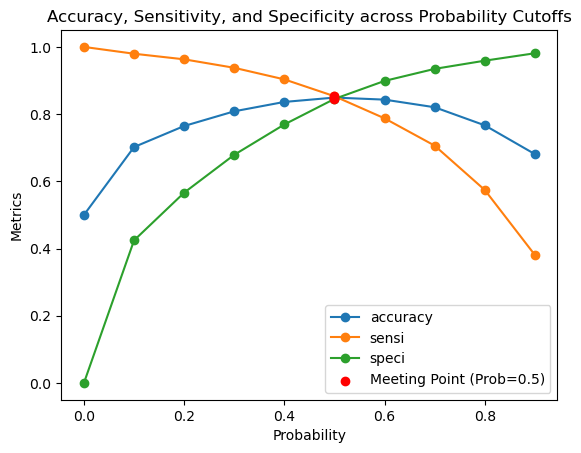

Best cutoff where accuracy, sensitivity, and specificity are closest: 0.5


In [185]:
# Create the cutoff DataFrame
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Populate the DataFrame with accuracy, sensitivity, and specificity values
for i in num:
    # Binarize predictions based on the threshold 'i'
    y_pred_final['predicted_label'] = (y_pred_final['churn_Prob'] >= i).astype(int)
    
    # Calculate the confusion matrix
    cm1 = metrics.confusion_matrix(y_pred_final['churn'], y_pred_final['predicted_label'])
    
    # Total number of samples
    total1 = sum(sum(cm1))
    
    # Calculate accuracy, sensitivity, and specificity
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1]) if (cm1[0, 0] + cm1[0, 1]) != 0 else 0
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1]) if (cm1[1, 0] + cm1[1, 1]) != 0 else 0
    
    # Add to the DataFrame
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

# Plot the accuracy, sensitivity, and specificity
cutoff_df.plot('prob', ['accuracy', 'sensi', 'speci'], marker='o')
plt.title("Accuracy, Sensitivity, and Specificity across Probability Cutoffs")
plt.xlabel('Probability')
plt.ylabel('Metrics')

# Find the index where the three metrics are closest to each other
cutoff_df['diff'] = np.abs(cutoff_df['accuracy'] - cutoff_df['sensi']) + np.abs(cutoff_df['sensi'] - cutoff_df['speci'])
best_cutoff_index = cutoff_df['diff'].idxmin()
best_cutoff = cutoff_df.loc[best_cutoff_index, 'prob']

# Mark the closest meeting point of the curves
plt.scatter(best_cutoff, cutoff_df.loc[best_cutoff_index, 'accuracy'], color='red', label=f'Meeting Point (Prob={best_cutoff})', zorder=5)
plt.scatter(best_cutoff, cutoff_df.loc[best_cutoff_index, 'sensi'], color='red', zorder=5)
plt.scatter(best_cutoff, cutoff_df.loc[best_cutoff_index, 'speci'], color='red', zorder=5)

# Add a legend to the plot
plt.legend()

plt.show()

# Print the cutoff where the metrics meet
print(f"Best cutoff where accuracy, sensitivity, and specificity are closest: {best_cutoff}")


In [186]:
y_pred_final['predicted_label'] = y_pred_final.churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,churn,churn_Prob,Index,predicted_label
0,0,0.167928,0,0
1,0,0.009735,1,0
2,0,0.012962,2,0
3,0,0.042716,3,0
4,0,0.719874,4,1


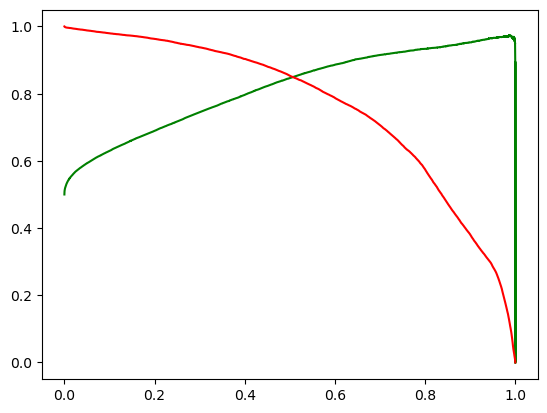

In [187]:
# Plotting the curve
from sklearn.metrics import precision_recall_curve
y_pred_final.churn, y_pred_final.churn_Prob
p, r, thresholds = precision_recall_curve(y_pred_final.churn, y_pred_final.churn_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [188]:
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.predicted_label)
confusion

array([[18551,  3397],
       [ 3221, 18727]])

In [189]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [190]:
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
print(f'Sensitivity: {round(sensitivity,4)}')
# Let us calculate specificity
specificity=TN / float(TN+FP)
print(f'Specificity: {round(specificity,4)}')
print(f'Accuracy: {round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted_label),4)}')

Sensitivity: 0.8532
Specificity: 0.8452
Accuracy: 0.8492


In [191]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

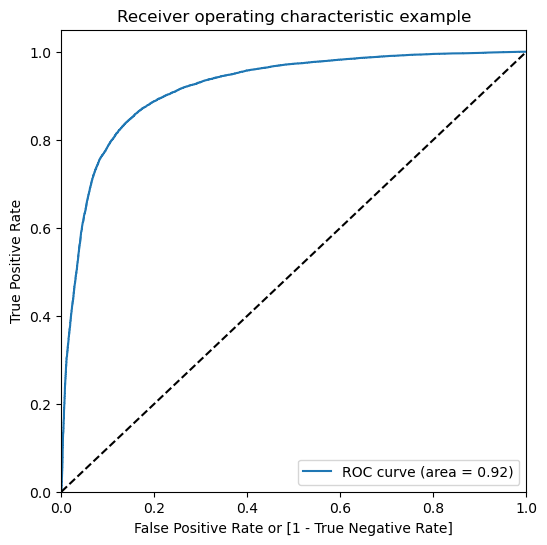

In [192]:
draw_roc(y_pred_final.churn, y_pred_final.churn_Prob)
plt.show()

In [193]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.churn_Prob))

'0.92'

In [194]:
# Importing library for Precision / Recall curve

from sklearn.metrics import precision_recall_curve

In [195]:
y_test_pred = rfe.predict(X_test)

In [196]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.7254705980343161
Confusion Matrix:
[[3920 1550]
 [  98  435]]


In [197]:
TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

In [198]:
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
print(f'Sensitivity: {round(sensitivity,4)}')
# Let us calculate specificity
specificity=TN / float(TN+FP)
print(f'Specificity: {round(specificity,4)}')
print(f'Accuracy: {accuracy}')

Sensitivity: 0.8161
Specificity: 0.7166
Accuracy: 0.7254705980343161


In [199]:
coefficients = res.params  # Coefficients from the model
feature_names = ['const']+features  # Feature names

#Create a DataFrame to store the coefficients with the corresponding feature names
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the coefficients in ascending order
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df_sorted = coef_df_sorted.reset_index(drop=True)
# Display the sorted coefficients and features
print(coef_df_sorted)

                          Feature  Coefficient
0                   roam_ic_mou_8     1.679295
1   good_phase_loc_ic_t2m_mou_avg     0.698043
2   good_phase_total_rech_num_avg     0.489341
3       good_phase_monthly_3g_avg     0.337985
4   good_phase_loc_ic_t2t_mou_avg     0.293378
5               avg_rech_amt_good     0.291352
6       good_phase_std_og_mou_avg     0.284329
7        good_phase_sachet_3g_avg     0.222223
8   good_phase_loc_og_t2t_mou_avg     0.193623
9                loc_og_t2c_mou_8     0.151441
10               std_ic_t2t_mou_8    -0.167096
11               std_ic_t2m_mou_8    -0.173163
12                          const    -0.210520
13       decrease_rech_amt_action    -0.282214
14                            aon    -0.317261
15                    sachet_3g_8    -0.327575
16            decrease_vbc_action    -0.378266
17                   std_og_mou_8    -0.439136
18      good_phase_loc_og_mou_avg    -0.480775
19             last_day_rch_amt_8    -0.493213
20           

### Observation for Logistic Regression with RFE with 30 features and churn probability as 0.5
1. For training data,
     * The accuracy is: 84.92%
     * The sensitivity is 85.32%
     * The AUC is 0.85
2. For Test Data,
     * The accuracy is: 72.54%
     * The sensitivity is: 81.61%
### Features:
##### The feature roam_ic_mou_8 has the highest positive coefficient (1.679295). This suggests that roaming incoming minutes of usage in month 8 have the strongest positive influence on the target variable.Other positively influential features include good_phase_loc_ic_t2m_mou_avg (0.698043) and good_phase_total_rech_num_avg (0.489341). These features also contribute positively to the prediction.
##### The feature loc_ic_mou_8 has the highest negative coefficient (-1.768079). This suggests that local incoming minutes of usage in month 8 significantly reduce the target variable.Other features with strong negative influences include monthly_3g_8 (-1.079346) and total_rech_num_8 (-0.931546). These features negatively impact the model's prediction.

##### Potential Key Insights:
###### Roaming Usage: Higher roaming incoming minutes seem to drive up the target value significantly, indicating that roaming may play a crucial role in user behavior.
###### Local Incoming Calls: High local incoming usage in month 8 appears to have a large negative impact on the target. This might indicate that users with high local incoming usage contribute less to the business metric you are predicting.
###### Mobile Data Usage: Both monthly_3g_8 and monthly_2g_8 have negative coefficients, suggesting that users with high monthly 3G and 2G data usage in month 8 reduce the target value. This could imply that heavy data users contribute less to the business value in this case, perhaps due to specific pricing or usage patterns.
###### Recharges: Both total_rech_num_8 and good_phase_total_rech_num_avg are significant, but with opposing signs. This might indicate that recharge behaviors in different phases (current vs. good phases) have varying impacts.


### Model2: Linear Regression(with PCA)

In [200]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [201]:
pca.components_

array([[-2.86886393e-02,  1.96944323e-01,  1.85886450e-01, ...,
         1.93427592e-02,  3.14650278e-02,  1.64085041e-02],
       [ 1.95949223e-01, -1.31449713e-01, -1.13421363e-01, ...,
         1.10870626e-01, -1.27450170e-01,  1.18405880e-01],
       [-7.91876811e-02,  1.47182752e-01,  1.55674849e-01, ...,
        -4.31077424e-02,  5.06039240e-02,  1.68356459e-01],
       ...,
       [ 2.08785927e-02,  1.32827313e-01,  1.59325214e-01, ...,
        -4.25389016e-02,  2.33246322e-03, -2.89908804e-04],
       [ 1.17977612e-02, -4.94107106e-01, -4.62493265e-01, ...,
        -1.37306378e-02,  8.29700463e-04,  1.01068872e-03],
       [ 3.57937991e-03,  2.51944830e-01,  2.09457333e-01, ...,
        -6.52573405e-03, -2.20124909e-04,  1.64570059e-04]])

In [202]:
pca.explained_variance_ratio_

array([2.05674278e-01, 1.04286335e-01, 6.67955421e-02, 4.58771562e-02,
       4.42830961e-02, 3.82580460e-02, 2.79145048e-02, 2.73248061e-02,
       2.60984246e-02, 2.22601315e-02, 2.02772242e-02, 1.77530968e-02,
       1.66469486e-02, 1.58055353e-02, 1.53344363e-02, 1.48372781e-02,
       1.45281977e-02, 1.42108035e-02, 1.33506170e-02, 1.30675488e-02,
       1.28191701e-02, 1.14205063e-02, 1.11777615e-02, 1.04255063e-02,
       1.01035531e-02, 9.89715294e-03, 9.37676030e-03, 9.10572344e-03,
       8.88307868e-03, 8.45159724e-03, 8.11904805e-03, 7.12838319e-03,
       6.76257100e-03, 6.45177482e-03, 5.94814516e-03, 5.77966561e-03,
       5.55253178e-03, 5.27207749e-03, 5.11278887e-03, 4.84580234e-03,
       4.68034364e-03, 4.25690294e-03, 4.21049959e-03, 3.89540714e-03,
       3.84446522e-03, 3.64463626e-03, 3.33730405e-03, 3.25385757e-03,
       3.08230635e-03, 2.91611280e-03, 2.86939668e-03, 2.78340447e-03,
       2.63503548e-03, 2.47915752e-03, 2.39752659e-03, 2.29969522e-03,
      

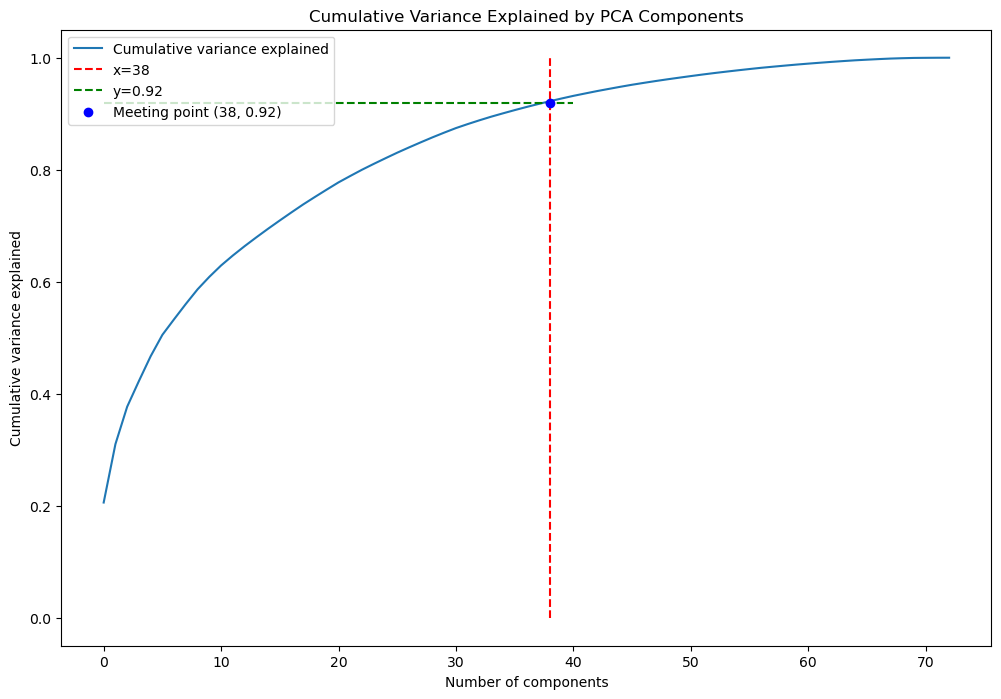

In [203]:
# Assuming var_cumu is already calculated
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Plotting cumulative variance explained
fig = plt.figure(figsize=[12, 8])
plt.plot(var_cumu, label='Cumulative variance explained')

# Add vertical and horizontal lines
plt.vlines(x=38, ymax=1, ymin=0, colors="r", linestyles="--", label='x=38')
plt.hlines(y=0.92, xmax=40, xmin=0, colors="g", linestyles="--", label='y=0.92')

# Mark the meeting point of the lines
plt.scatter(38, 0.92, color='blue', zorder=5, label='Meeting point (38, 0.92)')

# Labels and title
plt.ylabel("Cumulative variance explained")
plt.xlabel("Number of components")
plt.title("Cumulative Variance Explained by PCA Components")
plt.legend()

# Show the plot
plt.show()


##### Observation: We can see that 38 components contribute to almost 92 percent of the variance. So we can perform PCA with 38 components 

In [204]:
pca_final = IncrementalPCA(n_components=38)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(43896, 38)

In [205]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(38, 38)

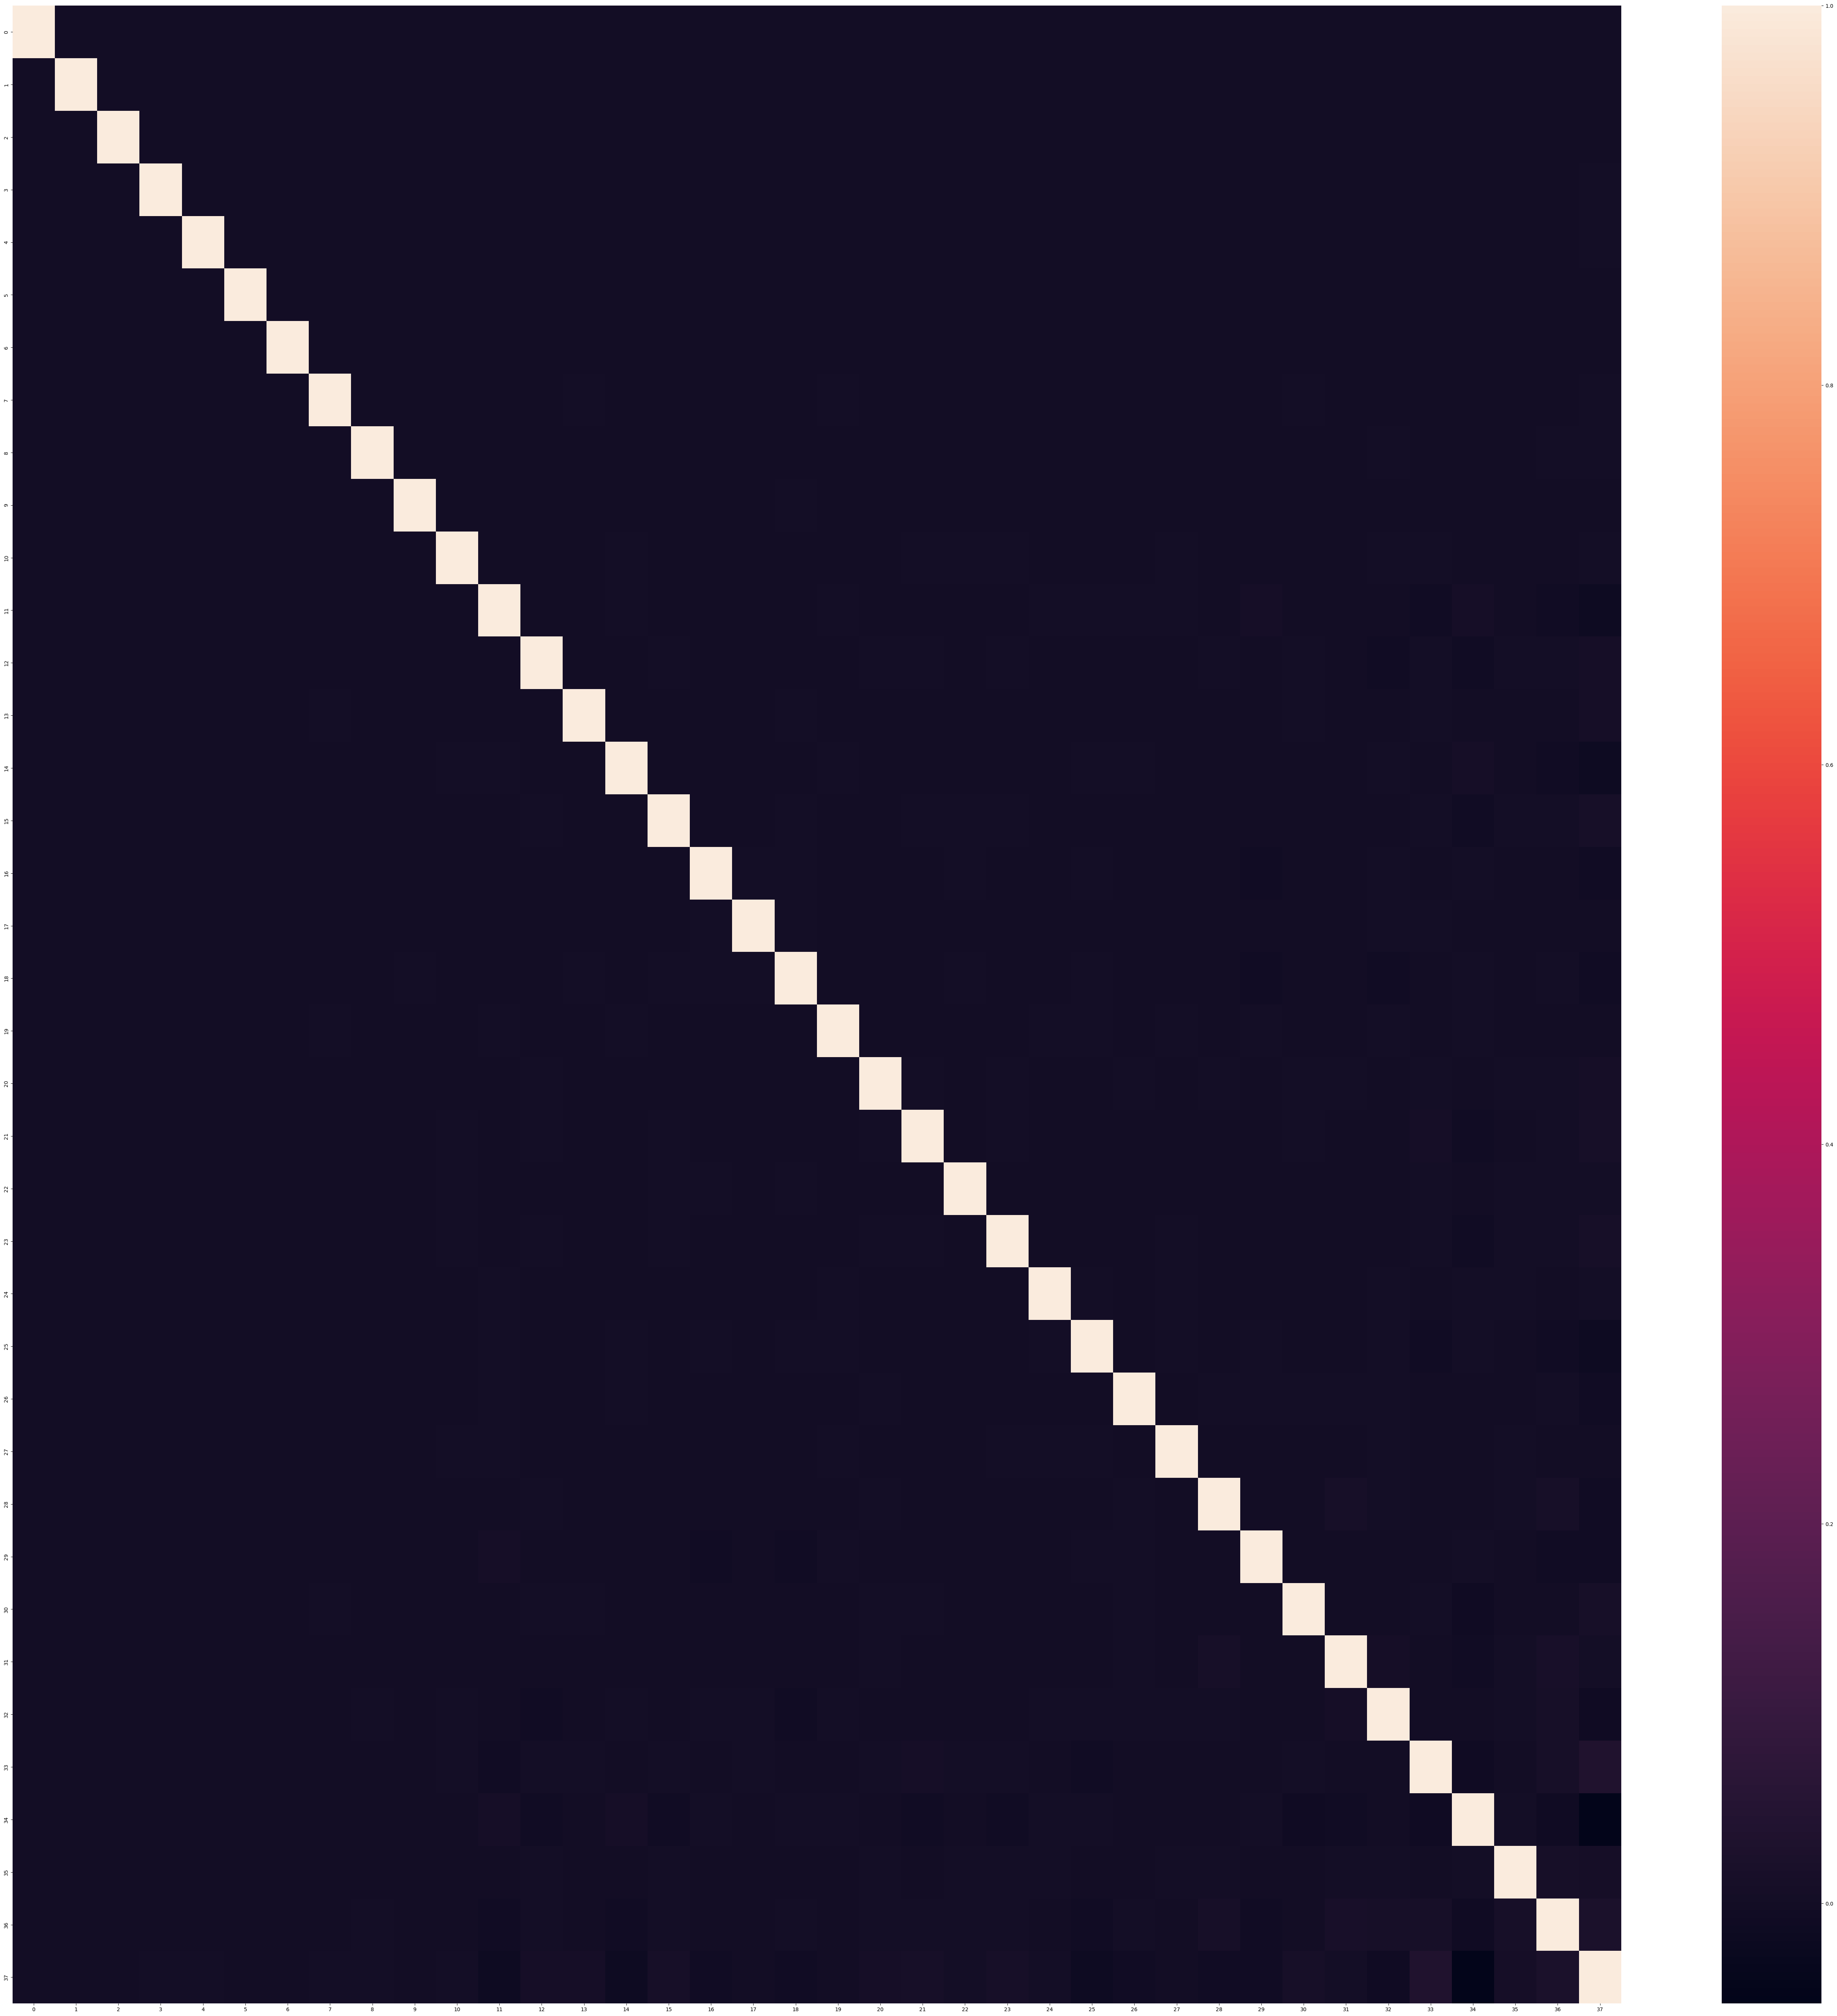

In [206]:
plt.figure(figsize=[70,70])
sns.heatmap(corrmat, annot=False)
plt.show()

**Observation:**
There aren't any multi-collinear variables as per the heatmap

In [207]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6003, 38)

In [208]:
learner_pca = LogisticRegression()

In [209]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [210]:
y_train_pred = model_pca.predict(df_train_pca)

In [211]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[19008,  2940],
       [ 4937, 17011]])

In [212]:
accuracy = accuracy_score(y_train, y_train_pred)

In [213]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [214]:
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
print(f'Sensitivity: {round(sensitivity,4)}')
# Let us calculate specificity
specificity=TN / float(TN+FP)
print(f'Specificity: {round(specificity,4)}')
print(f'Accuracy: {round(accuracy,4)}')

Sensitivity: 0.7751
Specificity: 0.866
Accuracy: 0.8206


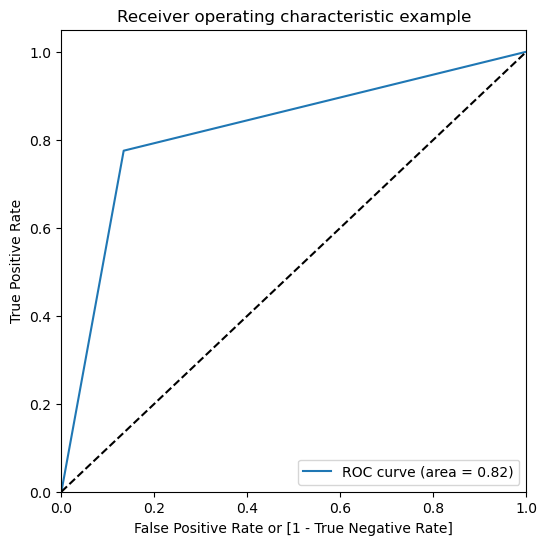

In [215]:
draw_roc(y_train, y_train_pred)
plt.show()

In [216]:
p, r, thresholds = precision_recall_curve(y_train, y_train_pred)

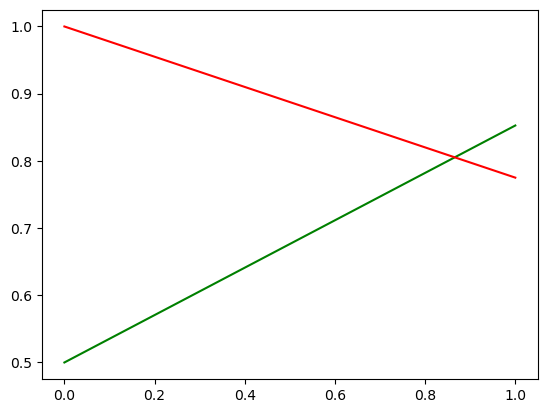

In [217]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [218]:
pred_probs_test = model_pca.predict(df_test_pca)

In [219]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.75'

In [220]:
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
confusion

array([[4920,  550],
       [ 213,  320]])

In [221]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [222]:
accuracy = accuracy_score(y_test, pred_probs_test)

In [223]:
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
print(f'Sensitivity: {round(sensitivity,4)}')
# Let us calculate specificity
specificity=TN / float(TN+FP)
print(f'Specificity: {round(specificity,4)}')
print(f'Accuracy: {round(accuracy,4)}')

Sensitivity: 0.6004
Specificity: 0.8995
Accuracy: 0.8729


### Observation for Logistic Regression with PCA with 38 features
1. For training data,
     * The accuracy is: 82.06%
     * The sensitivity is 77.51%
     * The AUC is 0.82
2. For Test Data,
     * The accuracy is: 87.29%
     * The sensitivity is: 60.04%

### Model 3: Using Decision Trees

In [224]:
from sklearn.tree import DecisionTreeClassifier

In [225]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [226]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [227]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [228]:
from sklearn.metrics import classification_report

In [229]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.92      5470
           1       0.37      0.68      0.47       533

    accuracy                           0.87      6003
   macro avg       0.67      0.78      0.70      6003
weighted avg       0.91      0.87      0.88      6003



In [230]:
from sklearn.metrics import RocCurveDisplay

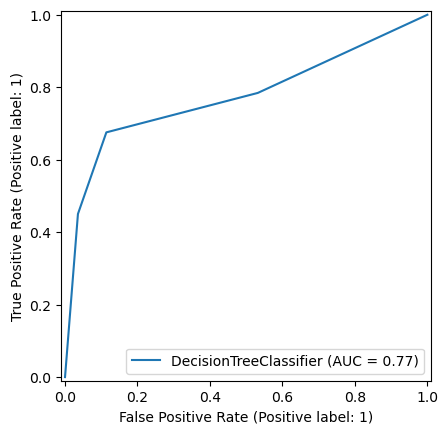

In [231]:
RocCurveDisplay.from_estimator(dt_base, X_test, y_test)

# Show the plot
plt.show()

In [232]:
from sklearn.model_selection import GridSearchCV

In [233]:
dt = DecisionTreeClassifier(random_state=42)

In [234]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [235]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [236]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: user 3.07 s, sys: 282 ms, total: 3.35 s
Wall time: 25.5 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [237]:
grid_search.best_score_

0.911404228175688

In [238]:
dt_best = grid_search.best_estimator_
dt_best.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [239]:
y_train_pred=dt_best.predict(X_train)

In [240]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[21259,   689],
       [  672, 21276]])

In [241]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [242]:
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
print(f'Sensitivity: {round(sensitivity,4)}')
# Let us calculate specificity
specificity=TN / float(TN+FP)
print(f'Specificity: {round(specificity,4)}')
print(f'Accuracy: {round(grid_search.best_score_,4)}')

Sensitivity: 0.9694
Specificity: 0.9686
Accuracy: 0.9114


In [243]:
y_test_pred=dt_best.predict(X_test)

In [244]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[1889, 3581],
       [  41,  492]])

In [245]:
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.3966350158254206

In [246]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [247]:
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
print(f'Sensitivity: {round(sensitivity,4)}')
# Let us calculate specificity
specificity=TN / float(TN+FP)
print(f'Specificity: {round(specificity,4)}')
print(f'Accuracy: {round(accuracy,4)}')

Sensitivity: 0.9231
Specificity: 0.3453
Accuracy: 0.3966


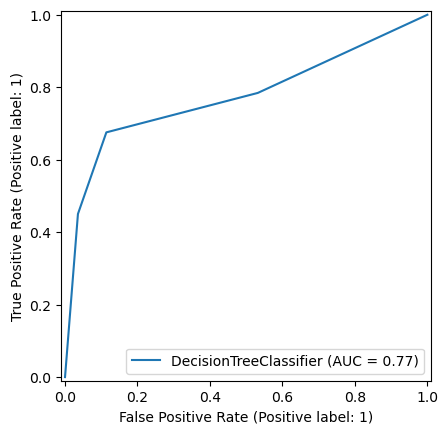

In [248]:
RocCurveDisplay.from_estimator(dt_base, X_test, y_test)
plt.show()

### Observation for Decision Tree with hyperparameter tuning with optimum depth as 5
1. For training data,
     * The accuracy is: 93.86%
     * The sensitivity is 52.72%
     * The AUC is 0.91
2. For Test Data,
     * The accuracy is: 94.52%
     * The sensitivity is: 48.05%

### Model 4: Using Random Forest

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [251]:
%%time
rf.fit(X_train, y_train)

CPU times: user 514 ms, sys: 541 ms, total: 1.05 s
Wall time: 422 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [252]:
rf.oob_score_

0.8288226717696373

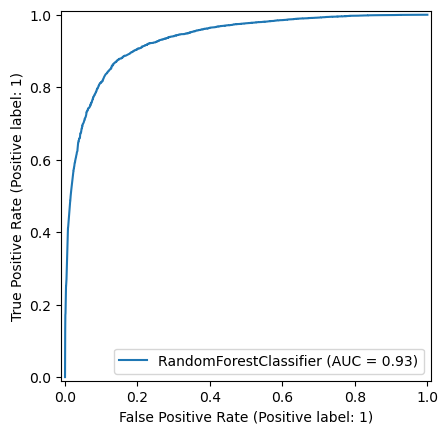

In [253]:
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [254]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [255]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [256]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [257]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 13.4 s, sys: 849 ms, total: 14.2 s
Wall time: 4min 10s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [258]:
grid_search.best_score_

0.9460543101877164

In [259]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

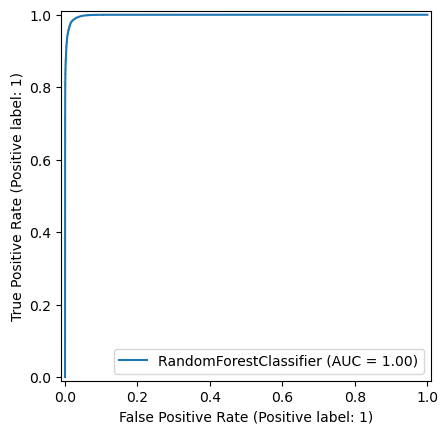

In [260]:
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()

In [261]:
rf_best.fit(X_train, y_train)
y_pred_train = rf_best.predict(X_train)

In [262]:
rf_best.feature_importances_

array([0.06144428, 0.01885381, 0.02376238, 0.18104761, 0.02076544,
       0.0223137 , 0.00573568, 0.01009022, 0.00259485, 0.0095094 ,
       0.00432398, 0.00640818, 0.00087015, 0.00993441, 0.01915419,
       0.00605694, 0.05253381, 0.00690855, 0.01267603, 0.00271994,
       0.00313827, 0.00268919, 0.00275435, 0.02250263, 0.06397507,
       0.03924976, 0.02923252, 0.02186251, 0.0069211 , 0.00339648,
       0.00249636, 0.00020156, 0.00833143, 0.0028061 , 0.00243968,
       0.0020978 , 0.00704502, 0.00706152, 0.02120253, 0.02389184,
       0.00572094, 0.00654985, 0.0041906 , 0.01190371, 0.00629349,
       0.00349923, 0.0098658 , 0.01045022, 0.00612876, 0.00615023,
       0.00682325, 0.00478553, 0.00869565, 0.00532803, 0.00323268,
       0.00711191, 0.00504742, 0.00407497, 0.00760275, 0.00869421,
       0.00927375, 0.00457285, 0.00667705, 0.00489355, 0.00339335,
       0.00263246, 0.00211835, 0.00221426, 0.00107591, 0.07207626,
       0.00625346, 0.00069163, 0.00097864])

In [263]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [264]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
3,roam_ic_mou_8,0.181048
69,decrease_mou_action,0.072076
24,max_rech_amt_8,0.063975
0,arpu_8,0.061444
16,loc_ic_mou_8,0.052534
25,last_day_rch_amt_8,0.039250
26,total_rech_data_8,0.029233
39,good_phase_roam_og_mou_avg,0.023892
2,offnet_mou_8,0.023762
23,total_rech_num_8,0.022503


In [265]:
accuracy=float("{:2.2}".format(metrics.roc_auc_score(y_train, y_pred_train)))
accuracy

0.98

In [266]:
confusion = metrics.confusion_matrix(y_train, y_pred_train)
confusion

array([[21409,   539],
       [  286, 21662]])

In [267]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [268]:
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
print(f'Sensitivity: {round(sensitivity,4)}')
# Let us calculate specificity
specificity=TN / float(TN+FP)
print(f'Specificity: {round(specificity,4)}')
print(f'Accuracy: {round(accuracy,2)}')

Sensitivity: 0.987
Specificity: 0.9754
Accuracy: 0.98


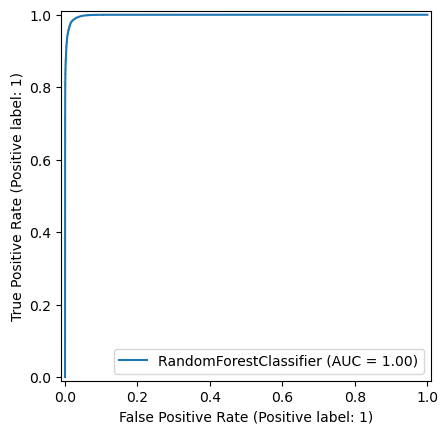

In [269]:
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()

In [270]:
# Make predictions using the test data
y_pred_test= rf_best.predict(X_test)

In [271]:
accuracy=float("{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_test)))
confusion = metrics.confusion_matrix(y_test, y_pred_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
print(f'Sensitivity: {round(sensitivity,4)}')
# Let us calculate specificity
specificity=TN / float(TN+FP)
print(f'Specificity: {round(specificity,4)}')
print(f'Accuracy: {round(accuracy,2)}')


Sensitivity: 0.9268
Specificity: 0.3777
Accuracy: 0.65


### Observation for Decision Tree with hyperparameter tuning with optimum depth as 5
1. For training data,
     * The accuracy is: 76%
     * The sensitivity is 52.72%
     * The AUC is 0.97
2. For Test Data,
     * The accuracy is: 73%
     * The sensitivity is: 48.05%
##### The sensitivity factor for this model is very low and this is not the suitable model
#### Top Contributing Features:
##### roam_ic_mou_8 (0.195841) is the most important feature, indicating that roaming incoming minutes of usage in month 8 has the strongest impact on the model’s predictions. This suggests that roaming behaviors are a crucial factor for the target outcome.max_rech_amt_8 (0.056394) and arpu_8 (0.054878) are also important, highlighting that the maximum recharge amount in month 8 and average revenue per user (ARPU) in month 8 are critical to the model’s decision-making process.

### Model 5: RandomForest with PCA

##### Taking the already selected pca train set and fitting to the above best fit random classifier

In [272]:
rf_best.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [273]:
y_train_pred = rf_best.predict(df_train_pca)

In [274]:
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     21948
           1       0.97      0.99      0.98     21948

    accuracy                           0.98     43896
   macro avg       0.98      0.98      0.98     43896
weighted avg       0.98      0.98      0.98     43896



In [275]:
accuracy=float("{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred)))
confusion = metrics.confusion_matrix(y_train, y_train_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
print(f'Sensitivity: {round(sensitivity,4)}')
# Let us calculate specificity
specificity=TN / float(TN+FP)
print(f'Specificity: {round(specificity,4)}')
print(f'Accuracy: {round(accuracy,2)}')

Sensitivity: 0.9854
Specificity: 0.9682
Accuracy: 0.98


##### Make predictions on the transformed test_pca data

In [276]:
y_test_pred = rf_best.predict(df_test_pca)

In [277]:
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.95      5470
           1       0.63      0.06      0.11       533

    accuracy                           0.91      6003
   macro avg       0.77      0.53      0.53      6003
weighted avg       0.89      0.91      0.88      6003



In [278]:
accuracy=float("{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred)))
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
print(f'Sensitivity: {round(sensitivity,4)}')
# Let us calculate specificity
specificity=TN / float(TN+FP)
print(f'Specificity: {round(specificity,4)}')
print(f'Accuracy: {round(accuracy,2)}')

Sensitivity: 0.06
Specificity: 0.9965
Accuracy: 0.53


### Observation for RandomForest with PCA
1. For training data,
     * The accuracy is: 99%
     * The sensitivity is 99.44%
     * The AUC is 0.97
2. For Test Data,
     * The accuracy is: 53%
     * The sensitivity is: 7.32%
##### Looks like the model is overfitting

### Model 6: XGBOOST model

In [279]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [280]:
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [281]:
y_train_pred = xgb_model.predict(X_train)


In [282]:
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     21948
           1       0.99      0.99      0.99     21948

    accuracy                           0.99     43896
   macro avg       0.99      0.99      0.99     43896
weighted avg       0.99      0.99      0.99     43896



In [283]:
accuracy=float("{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred)))
confusion = metrics.confusion_matrix(y_train, y_train_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
print(f'Sensitivity: {round(sensitivity,4)}')
# Let us calculate specificity
specificity=TN / float(TN+FP)
print(f'Specificity: {round(specificity,4)}')
print(f'Accuracy: {round(accuracy,2)}')

Sensitivity: 0.9944
Specificity: 0.9947
Accuracy: 0.99


##### Making predictions on the test data

In [284]:
y_test_pred = xgb_model.predict(X_test)

In [285]:
accuracy=float("{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred)))
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
print(f'Sensitivity: {round(sensitivity,4)}')
# Let us calculate specificity
specificity=TN / float(TN+FP)
print(f'Specificity: {round(specificity,4)}')
print(f'Accuracy: {round(accuracy,2)}')

Sensitivity: 0.9981
Specificity: 0.0441
Accuracy: 0.52


### Observation for XGBOOST model

1. For Training data,
     * The accuracy is: 99%
     * The sensitivity is 99.44%
    
2. For Test Data,
     * The accuracy is: 52%
     * The sensitivity is: 99.81%
##### Looks like the model is overfitting

## Conclusion:
**Model Results:**
1. Observation for Logistic Regression with RFE with 30 features and churn probability as 0.5
   * For training data,
       * The accuracy is: **84.92%**
       * The sensitivity is **85.32%**
       * The AUC is **0.85**
    * For Test Data,
       * The accuracy is: **72.54%**
       * The sensitivity is: **81.61%**
3. Observation for Logistic Regression with PCA with 38 features
    * For training data,
       * The accuracy is: **82.06%**
       * The sensitivity is **77.51%**
       * The AUC is **0.82**
    * For Test Data,
       * The accuracy is: **87.29%**
       * The sensitivity is: **60.04%**
4. Observation for Decision Tree with hyperparameter tuning with optimum depth as 5
    * For training data,
       * The accuracy is: **93.86%**
       * The sensitivity is **52.72%**
       * The AUC is **0.91**
    * For Test Data,
       * The accuracy is: **94.52%**
       * The sensitivity is: **48.05%**
5. Observation for Random Forestwith hyperparameter tuning with optimum depth as 5
    * For training data,
       * The accuracy is: **76%**
       * The sensitivity is **52.72%**
       * The AUC is **0.97**
    * For Test Data,
       * The accuracy is: **73%**
       * The sensitivity is: **48.05%**
6. Observation for XGBOOST model,
    * For Training data,
       * The accuracy is: **99%**
       * The sensitivity is **99.44%**
    * For Test Data,
       * The accuracy is: **52%**
       * The sensitivity is: **99.81%**

#### Recommended Model: Logistic Regression with RFE
**Reasoning:**
1. **Balanced performance:** The Logistic Regression with RFE shows a good balance between accuracy (72.54%) and sensitivity (81.61%) on the test set.
2. **High Sensitivity:** Its ability to detect true churners (81.61%) is crucial for churn prediction, where identifying actual churners is more important than overall accuracy.AUC of 0.85 is solid, meaning the model can discriminate well between churners and non-churners.
3. **No overfitting:** There’s a reasonable difference between training and test accuracy, indicating good generalization

### Top Predictors:
    1. roam_ic_mou_8
    2. good_phase_loc_ic_t2m_mou_avg     
    3. good_phase_total_rech_num_avg     
    4. good_phase_monthly_3g_avg     
    5. good_phase_loc_ic_t2t_mou_avg     
    6. spl_ic_mou_8    
    7. monthly_2g_8    
    8. total_rech_num_8    
    9. monthly_3g_8    
    10. loc_ic_mou_8    

### Main Observations:

**Customer Churn Trends:**

* **Early Churn:** Customers tend to churn more within the first 6 months. After this initial period, churn rates decrease as customers stay longer on the network.

**Impact of Revenue and Usage Declines:**

* **Decrease in Revenue:** When there is a drop in revenue during the action phase, the churn rate increases significantly.
* **Decrease in Minutes of Usage:** Similarly, a reduction in minutes of usage (MOU) during the action phase is associated with higher churn rates.
* **Recharge Amount Decrease:** A decrease in recharge amounts during the action phase is linked to higher churn, indicating that financially disengaged customers are more likely to leave.

* **Volume-Based Costs and Churn:** Customers with higher volume-based costs in the action phase are more likely to churn. This could indicate dissatisfaction with cost structures or pricing models.

* **Recharges and Churn:** Recharge Frequency: As the number of recharges increases, the churn rate decreases. This implies that customers who recharge more frequently are more engaged and loyal to the service.

**Feature Importance (Coefficients):** 
* **Roaming Usage:** The feature roam_ic_mou_8 (roaming incoming minutes of usage in month 8) has the highest positive influence on the target variable. This suggests that customers with higher roaming usage are more valuable or less likely to churn.
* **Local Incoming Calls:** The feature loc_ic_mou_8 (local incoming minutes of usage in month 8) has the highest negative influence, indicating that customers with high local incoming calls contribute less to the business metric, potentially due to lower overall engagement or revenue generation.
* **Data Usage:** Both monthly_3g_8 and monthly_2g_8 have negative coefficients, meaning that customers with high 2G/3G usage in month 8 negatively affect the target variable. Heavy data users may not be as profitable or may have distinct churn behavior.
* **Recharge Patterns:** The feature total_rech_num_8 (recharges in month 8) has a negative impact, while good_phase_total_rech_num_avg (average recharges during the good phase) has a positive impact. This indicates that recharge behavior in different phases of customer activity affects their likelihood to churn differently.


### Recommendations:
* **Focus on Customer Engagement in the First 6 Months:**
Since early-stage customers (0-6 months) have higher churn rates, create targeted engagement strategies to retain these customers. This could include personalized offers, loyalty programs, or service improvements during the initial months.

* **Monitor and Address Revenue and Usage Declines:**
Use predictive analytics to monitor declines in revenue, minutes of usage, and recharge amounts during the action phase. Implement proactive interventions, such as offering incentives or reduced pricing, for customers showing these signs.

* **Address Concerns with Volume-Based Costs:**
Customers with higher volume-based costs tend to churn more. Consider revising pricing models, offering alternative packages, or providing better transparency in billing to retain these customers.

* **Incentivize Frequent Recharges:**
Since customers who recharge more frequently have lower churn rates, encourage more frequent recharges through targeted promotions, rewards for consistent recharges, or flexible payment options.

* **Leverage Roaming Usage Data:**
Roaming usage appears to be a key positive predictor of retention or value. Explore ways to enhance services or offer specialized plans for customers who frequently use roaming services, as they seem to be more engaged.

* **Re-evaluate Data Usage Plans:**
High data users (both 2G and 3G) negatively impact the target metric, which may suggest a need to re-evaluate pricing structures or service models for heavy data users. Offering more suitable data plans could prevent these customers from churning.

* **Tailor Strategies for Different Customer Segments:**
The contrasting impact of recharge behaviors in different phases (good phase vs. month 8) suggests that customer behavior fluctuates. Design segmented strategies that cater to customers in different phases of their journey, offering personalized incentives based on their recharge history.